# Исследование причин сердечно-сосудистых заболеваний (ССЗ)

## Данные

Набор данных состоит из 70 000 записей данных о пациентах по 12 параметрам, таким как возраст, пол, систолическое артериальное давление, диастолическое артериальное давление и т.д. Целевой класс "кардио" равен 1, если у пациента есть сердечно-сосудистые заболевания, и 0, если пациент здоров.

Датасет: <https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset>

- Возраст - age
- Пол - gender (1: женщины, 2: мужчины)
- Рост - height (cm)
- Вес - weight (kg)
- Систолическое кровяное давление (верхняя граница) - ap_hi
- Диастолическое кровяное давление (нижняя граница) - ap_lo
- Холестерол - cholesterol (1: норма, 2: сверх нормы, 3: сильно выше нормы)
- Глюкоза - gluc (1: норма, 2: сверх нормы, 3: сильно выше нормы)
- Курение - smoke (1: курящие, 0: нет)
- Употребление алкоголя - alco (1: да, 0: нет)
- Физ. активность (1: присутствует, 0: отсутсвует)
- Наличие сердечно-сосудистых заболеваний (ССЗ) - cardio (1: есть, 0: нет)

## Задача

Найти закономерности по наличию или отсутствию сердечно-сосудистых заболеваний (ССЗ) по результатам обследований пациентов

Подзадачи:  
Проверить, есть ли зависимость между:
- возрастом и наличием ССЗ
- полом и наличием ССЗ
- давлением и наличием ССЗ
- уронем холестерина и наличием ССЗ
- курением и наличием ССЗ
- употреблением алкоголя и наличием ССЗ
- физ. активностью и наличием ССЗ.
- ИМТ и наличием ССЗ.

## Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats as st
from scipy.stats import shapiro
from scipy.stats import levene

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/drweb/datasets/cardio_train.csv', sep=';', index_col='id')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [4]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.duplicated().sum()

24

В датасете представлено 70 000 строк и 12 столбцов с данными о 70 000 пациентах. Пропуски и дубликаты отсутствуют. Столбец age представлен в неудобной форме (в днях) - переведём его в кол-во лет. Заменим тип данных в столбце weight, ap_hi, ap_lo на целочисленный. В столбцах gender, cholesterol, gluc, smoke, alcohol, active, cardio заменим значения на удобочитаемые.

## Предобработка данных

### Изменение типов данных

In [6]:
df['age'] = (df['age']/365).astype(int)

df.weight = df.weight.astype(int)
df.ap_hi = df.ap_hi.astype(int)
df.ap_lo = df.ap_lo.astype(int)

df.gender = df.gender.replace({1:'Ж', 2:'М'})
df[['gluc', 'cholesterol']] = df[['gluc', 'cholesterol']].replace({1:'норма', 2:'повышенный', 3:'высокий'})
df.smoke = df.smoke.replace({0:'некурящий', 1:'курящий'})
df.alco = df.alco.replace({0:'не употребляет', 1:'употребляет'})
df.active = df.active.replace({0:'не активен', 1:'активен'})
df.cardio = df.cardio.replace({0:'не болен', 1:'болен'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          70000 non-null  int32 
 1   gender       70000 non-null  object
 2   height       70000 non-null  int64 
 3   weight       70000 non-null  int32 
 4   ap_hi        70000 non-null  int32 
 5   ap_lo        70000 non-null  int32 
 6   cholesterol  70000 non-null  object
 7   gluc         70000 non-null  object
 8   smoke        70000 non-null  object
 9   alco         70000 non-null  object
 10  active       70000 non-null  object
 11  cardio       70000 non-null  object
dtypes: int32(4), int64(1), object(7)
memory usage: 5.9+ MB


In [8]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,М,168,62,110,80,норма,норма,некурящий,не употребляет,активен,не болен
1,55,Ж,156,85,140,90,высокий,норма,некурящий,не употребляет,активен,болен
2,51,Ж,165,64,130,70,высокий,норма,некурящий,не употребляет,не активен,болен
3,48,М,169,82,150,100,норма,норма,некурящий,не употребляет,активен,болен
4,47,Ж,156,56,100,60,норма,норма,некурящий,не употребляет,не активен,не болен


### Добавление столбцов

Добавим доп. столбец с индексом массы тела и степенью ожирения

**Справка:**  
В соответствии с рекомендациями всемирной организации здравоохранения (ВОЗ) разработана следующая интерпретация показателей ИМТ:  
- 16 и менее – выраженный дефицит массы,
- 16 – 17,9 – недостаточная масса тела,
- 18 – 24,9 – нормальный вес,
- 25 – 29,9 – избыточная масса тела (предожирение),
- 30 – 34,9 – ожирение 1 степени, 35 – 39,9 – ожирение 2 степени,
- 40 и более – ожирение 3 степени (морбидное).  
Индекс массы тела (ИМТ) – это индикатор, позволяющий рассчитать нормальный вес для человека с определенным ростом и, тем самым, косвенно оценить, является ли масса недостаточной, нормальной или избыточной(ожирение). 

In [9]:
df['bmi'] = round(df.weight/((df.height/100)**2), 1)

In [10]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50,М,168,62,110,80,норма,норма,некурящий,не употребляет,активен,не болен,22.0
1,55,Ж,156,85,140,90,высокий,норма,некурящий,не употребляет,активен,болен,34.9
2,51,Ж,165,64,130,70,высокий,норма,некурящий,не употребляет,не активен,болен,23.5
3,48,М,169,82,150,100,норма,норма,некурящий,не употребляет,активен,болен,28.7
4,47,Ж,156,56,100,60,норма,норма,некурящий,не употребляет,не активен,не болен,23.0


In [11]:
df['bmi_type'] = (
np.where
 (
    df.bmi < 16, 'Дефицит',
    np.where(df.bmi < 18, 'Недостаток',
             np.where(df.bmi < 25, 'Норма',
                      np.where(df.bmi < 30, 'Избыток',
                               np.where(df.bmi < 35, 'Ожирение 1 ст.',
                                        np.where(df.bmi < 40, 'Ожирение 2 ст.', 'Ожирение 3 ст.')
                                                
                                       )
                              )
                     )
            )
 )
                )

In [12]:
df.sample(20)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
3436,53,Ж,162,50,130,90,высокий,норма,некурящий,не употребляет,активен,болен,19.1,Норма
11173,51,М,176,78,120,80,норма,норма,некурящий,не употребляет,активен,не болен,25.2,Избыток
55228,40,Ж,160,55,100,60,норма,норма,некурящий,не употребляет,активен,не болен,21.5,Норма
4317,52,Ж,171,74,110,70,повышенный,норма,некурящий,не употребляет,активен,болен,25.3,Избыток
34860,56,Ж,168,68,120,80,норма,норма,некурящий,не употребляет,активен,не болен,24.1,Норма
19514,63,Ж,159,76,120,80,высокий,высокий,курящий,не употребляет,активен,болен,30.1,Ожирение 1 ст.
45600,50,М,182,90,150,90,норма,норма,некурящий,не употребляет,не активен,болен,27.2,Избыток
97860,50,Ж,163,65,120,70,норма,норма,некурящий,не употребляет,не активен,болен,24.5,Норма
64455,45,Ж,160,70,130,90,норма,норма,некурящий,не употребляет,не активен,не болен,27.3,Избыток


## Исследовательский анализ данных (EDA) 

Посмотрим на описательную статистику

In [13]:
df.describe()

,age,height,weight,ap_hi,ap_lo,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,164.359229,74.204329,128.817286,96.630414,27.554756
std,6.766774,8.210126,14.395953,154.011419,188.472530,6.092002
min,29.000000,55.000000,10.000000,-150.000000,-70.000000,3.500000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.900000
50%,53.000000,165.000000,72.000000,120.000000,80.000000,26.400000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,30.200000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000,298.700000


Первые выводы: средний возраст - 53 года, рост - 164 см., вес - 74кг, давление - 129 на 97, ИМТ - 27.6.  
Видим, что в столбцах с границами давления присутствуют отрицательные значения. Впоследствии, заменим их на положительные. В этих столбцах, помимо этого, аномальные максимальные значения.   
Также присутствует аномально низкий вес в 10 кг и рост в 55 см.  
Заметим, что присутствует и аномальный ИМТ в 298.7.

### age

In [14]:
sns.set_style("darkgrid")

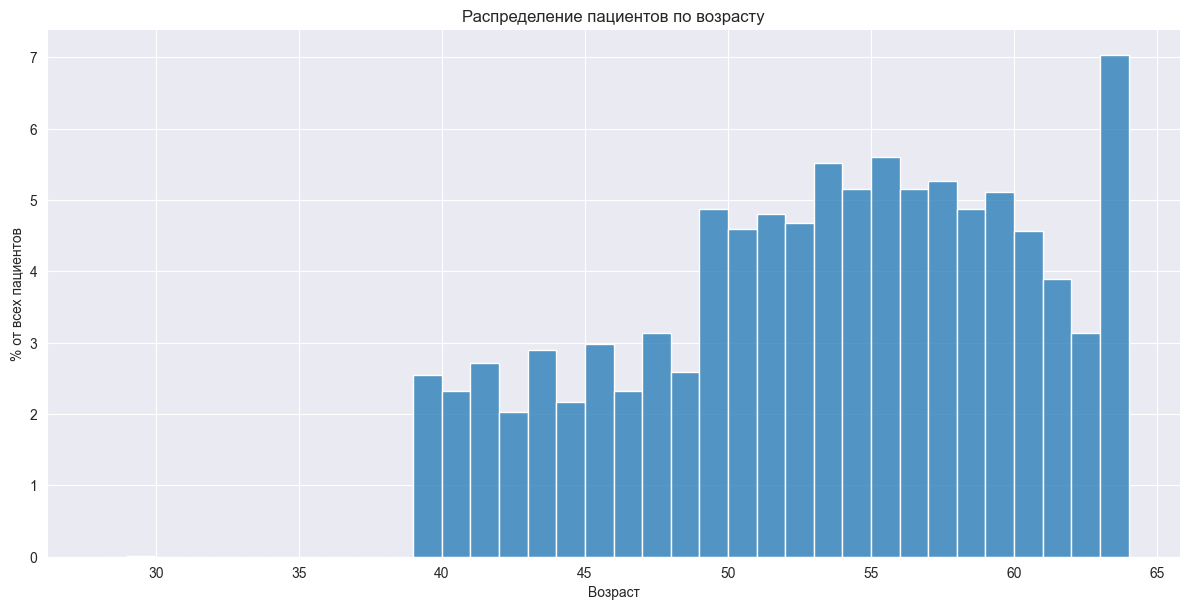

In [15]:
sns.displot(data=df['age'], height = 6, aspect = 12/6, bins = range(28, 65), stat='percent')
plt.title('Распределение пациентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('% от всех пациентов')
plt.show()

In [16]:
df.sort_values(by='age')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
43842,29,Ж,159,59,120,80,норма,норма,некурящий,не употребляет,активен,не болен,23.3,Норма
8850,29,Ж,175,59,120,80,норма,норма,некурящий,не употребляет,активен,не болен,19.3,Норма
31922,29,М,175,92,100,60,норма,норма,некурящий,не употребляет,активен,не болен,30.0,Ожирение 1 ст.
79749,30,Ж,160,59,110,70,норма,норма,некурящий,не употребляет,активен,не болен,23.0,Норма
61766,39,Ж,162,62,120,80,норма,норма,некурящий,не употребляет,активен,не болен,23.6,Норма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82491,64,М,164,68,120,80,норма,норма,некурящий,не употребляет,активен,не болен,25.3,Избыток
78109,64,М,163,65,120,80,норма,норма,некурящий,не употребляет,активен,болен,24.5,Норма
72087,64,М,174,72,180,100,высокий,норма,некурящий,не употребляет,не активен,болен,23.8,Норма


В датасете присутствует 4 пациента в возрасте до 30 лет. Наиболее часто встречающийся возраст - 64 года (в 7% случаев). В основном, встречаются пациента в возрасте от 50 до 61 года.

### gender

In [17]:
df.gender.value_counts(normalize=True)

gender
Ж    0.650429
М    0.349571
Name: proportion, dtype: float64

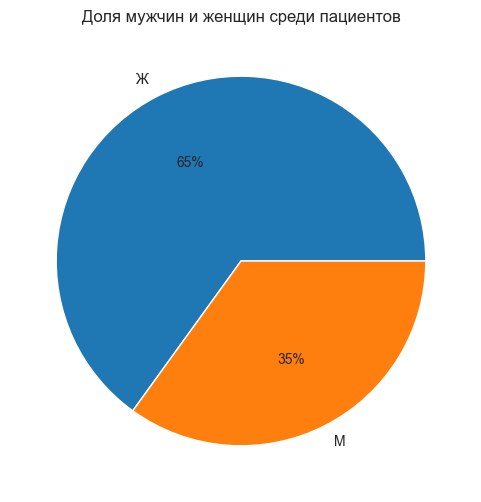

In [18]:
plt.figure(figsize=(6,6))
ax = df.gender.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Доля мужчин и женщин среди пациентов')
plt.ylabel('')
plt.show()

В датасете представлено 65% женщин и 35% мужчин.

### height

In [19]:
df.height.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.999])

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
1%         147.000000
5%         152.000000
25%        159.000000
50%        165.000000
75%        170.000000
90%        175.000000
95%        178.000000
99.9%      190.000000
max        250.000000
Name: height, dtype: float64

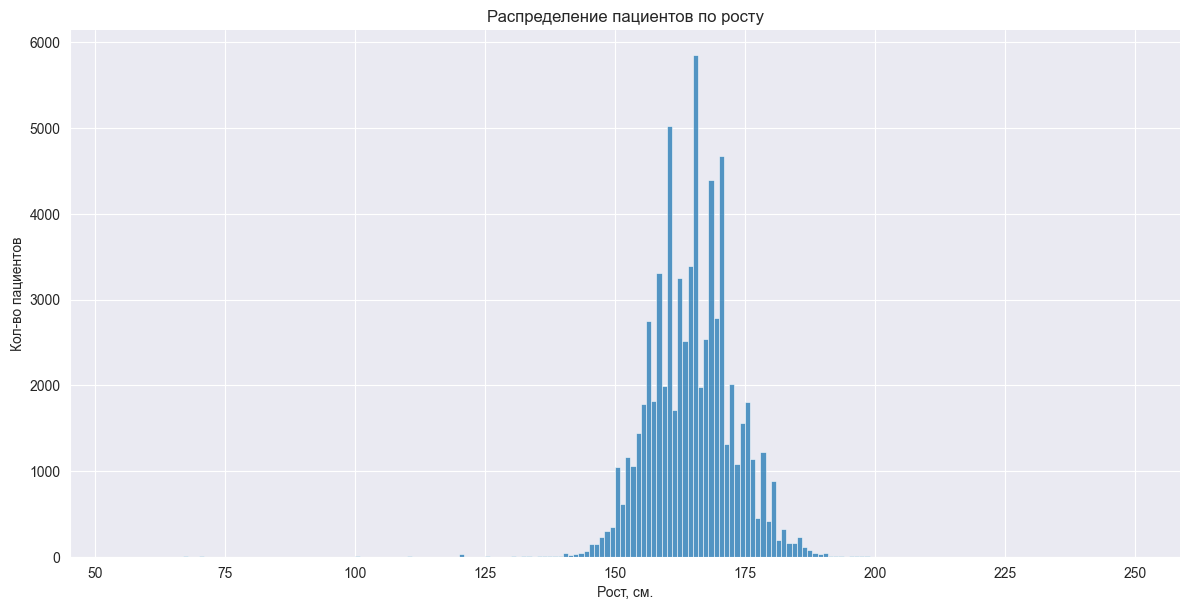

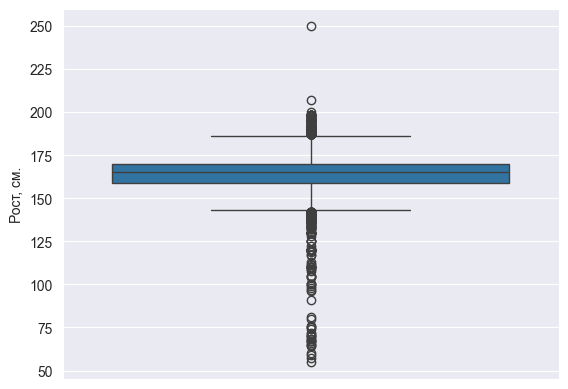

In [20]:
sns.displot(data=df['height'], height = 6, aspect = 12/6, bins = range(df.height.min(), df.height.max()))
plt.title('Распределение пациентов по росту')
plt.xlabel('Рост, см.')
plt.ylabel('Кол-во пациентов')
plt.show()

sns.boxplot(data=df['height'])
plt.ylabel('Рост, см.')
plt.show()

In [21]:
df.query('height == 250')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
9223,58,Ж,250,86,140,100,высокий,норма,некурящий,не употребляет,активен,болен,13.8,Дефицит


In [22]:
df.query('height < 147')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
309,59,М,76,55,120,80,норма,норма,некурящий,не употребляет,активен,не болен,95.2,Ожирение 3 ст.
343,49,Ж,142,61,120,80,норма,норма,некурящий,не употребляет,активен,не болен,30.3,Ожирение 1 ст.
506,54,Ж,144,44,130,80,норма,норма,некурящий,не употребляет,активен,не болен,21.2,Норма
555,49,Ж,144,59,120,80,повышенный,повышенный,некурящий,не употребляет,активен,болен,28.5,Избыток
1010,55,М,146,45,120,80,норма,норма,некурящий,не употребляет,активен,не болен,21.1,Норма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99172,52,Ж,140,52,150,80,повышенный,норма,некурящий,не употребляет,активен,болен,26.5,Избыток
99456,51,М,146,65,130,80,норма,норма,некурящий,не употребляет,активен,болен,30.5,Ожирение 1 ст.
99562,58,Ж,144,115,140,90,норма,норма,некурящий,употребляет,не активен,болен,55.5,Ожирение 3 ст.


В целях нашего исследования уберём предельные значения, которые могут исказить результат. Вероятно, что люди ниже 130 см. и выше 210 - карлики и гиганты соответственно. Однако, неясно, как определить их настоящий вес. Это будет искажать картину ИМТ.  
Ликвидируем рост сверх 99.9 и ниже 1 перцентилей

In [23]:
df = df.query('height >=147 & height <= 190').copy()

In [24]:
df.shape

(69265, 14)

In [25]:
df.height.describe()

count    69265.000000
mean       164.588941
std          7.589852
min        147.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        190.000000
Name: height, dtype: float64

### weight

In [26]:
df.weight.describe([0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.999])

count    69265.000000
mean        74.270699
std         14.301190
min         10.000000
1%          48.000000
5%          55.000000
25%         65.000000
50%         72.000000
75%         82.000000
90%         93.000000
95%        100.000000
99.9%      145.000000
max        200.000000
Name: weight, dtype: float64

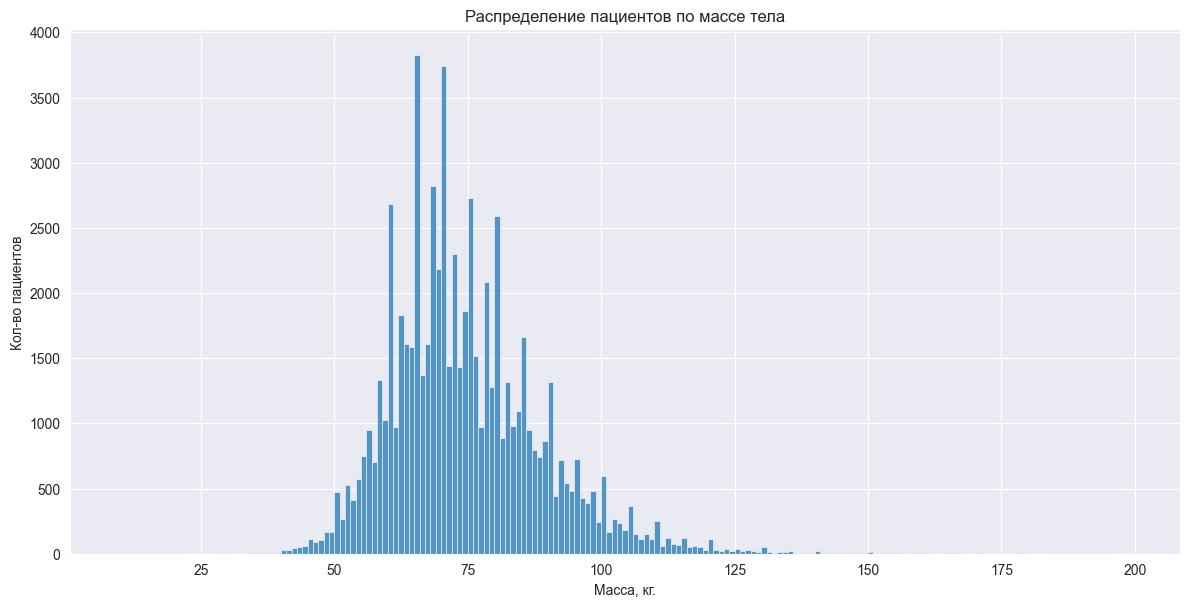

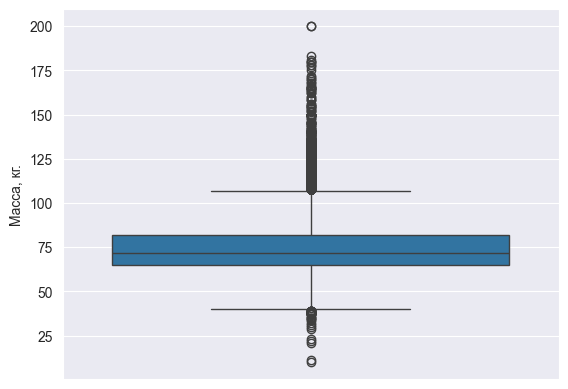

In [27]:
sns.displot(data=df['weight'], height = 6, aspect = 12/6, bins = range(df.weight.min(), df.weight.max()))
plt.title('Распределение пациентов по массе тела')
plt.xlabel('Масса, кг.')
plt.ylabel('Кол-во пациентов')
plt.show()

sns.boxplot(data=df['weight'])
plt.ylabel('Масса, кг.')
plt.show()

Посмотрим на аномальные значения массы тела

In [28]:
df.query('weight < 40').sort_values(by='weight')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
82567,51,М,165,10,180,1100,повышенный,повышенный,некурящий,не употребляет,активен,болен,3.7,Дефицит
48318,59,М,178,11,130,90,норма,норма,некурящий,не употребляет,активен,болен,3.5,Дефицит
85931,59,Ж,162,21,120,80,повышенный,норма,некурящий,не употребляет,активен,болен,8.0,Дефицит
42156,55,М,177,22,120,80,норма,норма,курящий,употребляет,активен,не болен,7.0,Дефицит
38312,63,Ж,157,23,110,80,норма,норма,некурящий,не употребляет,активен,не болен,9.3,Дефицит
86650,51,Ж,171,29,110,70,повышенный,норма,некурящий,не употребляет,активен,болен,9.9,Дефицит
26503,49,Ж,160,30,120,80,норма,норма,некурящий,не употребляет,активен,болен,11.7,Дефицит
24167,47,М,170,31,150,90,повышенный,повышенный,некурящий,не употребляет,активен,болен,10.7,Дефицит
54851,59,Ж,154,32,110,60,норма,норма,некурящий,не употребляет,активен,не болен,13.5,Дефицит


In [29]:
df.query('weight > 145').sort_values(by='weight', ascending=False)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
71945,41,М,180,200,150,90,норма,норма,некурящий,не употребляет,активен,болен,61.7,Ожирение 3 ст.
618,45,Ж,186,200,130,70,норма,норма,некурящий,не употребляет,не активен,не болен,57.8,Ожирение 3 ст.
87498,57,М,180,183,110,80,высокий,высокий,некурящий,употребляет,активен,болен,56.5,Ожирение 3 ст.
52564,53,Ж,161,181,180,1100,повышенный,норма,некурящий,не употребляет,активен,болен,69.8,Ожирение 3 ст.
64829,47,М,190,180,140,80,повышенный,повышенный,некурящий,не употребляет,активен,болен,49.9,Ожирение 3 ст.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41066,57,М,180,148,160,90,высокий,норма,курящий,не употребляет,активен,болен,45.7,Ожирение 3 ст.
66134,58,Ж,162,148,140,80,высокий,повышенный,некурящий,не употребляет,активен,болен,56.4,Ожирение 3 ст.
96291,50,М,190,147,150,90,норма,повышенный,некурящий,употребляет,активен,болен,40.7,Ожирение 3 ст.


У многих людей при нормальном росте масса вполне может превосходить и 200кг, однако тяжело представить ситуацию с массой тела при нормальном росте менее, чем 30 кг. Для того, чтобы более адекватно ликвидировать аномалии, уберём пациентов с ИМТ меньше 10.

In [30]:
df = df.query('bmi >=10').copy()
df.shape

(69259, 14)

### Давление

In [31]:
df[['ap_hi', 'ap_lo']].describe([0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.999])

,ap_hi,ap_lo
count,69259.000000,69259.000000
mean,128.822406,96.627124
std,154.818612,189.041828
min,-150.000000,-70.000000
1%,90.000000,60.000000
5%,100.000000,70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
90%,150.000000,90.000000


Для начала заменим отрицательные значения на положительные

In [32]:
df[['ap_hi', 'ap_lo']] = abs(df[['ap_hi', 'ap_lo']])

Посмотрим на аномальные значения давления

Разделим все значения выше 10.000 на 100, выше 900 на 10 в случае с верхней границей давления.  
Разделим все значения выше 10.000 на 100, выше 600 на 10 в случае с нижней границей давления.  

In [33]:
df.sort_values(by='ap_hi', ascending=False).head(20)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
58374,47,Ж,169,70,16020,80,норма,норма,некурящий,не употребляет,не активен,болен,24.5,Норма
36414,58,Ж,169,71,14020,80,высокий,высокий,некурящий,не употребляет,активен,болен,24.9,Норма
67502,54,Ж,160,65,14020,90,норма,норма,некурящий,не употребляет,активен,не болен,25.4,Избыток
36339,43,М,169,75,14020,80,повышенный,норма,некурящий,не употребляет,активен,болен,26.3,Избыток
66998,46,М,180,78,14020,90,норма,норма,некурящий,не употребляет,активен,болен,24.1,Норма
79679,63,Ж,161,105,13010,80,норма,норма,некурящий,не употребляет,не активен,не болен,40.5,Ожирение 3 ст.
79116,50,Ж,152,76,13010,80,повышенный,повышенный,некурящий,не употребляет,активен,болен,32.9,Ожирение 1 ст.
11089,57,Ж,175,80,11500,90,норма,норма,некурящий,не употребляет,активен,болен,26.1,Избыток
73356,51,М,168,65,11020,80,норма,норма,некурящий,не употребляет,активен,болен,23.0,Норма


In [34]:
df.sort_values(by='ap_lo', ascending=False).head(20)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
61901,63,Ж,160,105,200,11000,норма,норма,некурящий,не употребляет,активен,болен,41.0,Ожирение 3 ст.
3352,57,М,186,105,140,10000,норма,норма,некурящий,не употребляет,активен,болен,30.4,Ожирение 1 ст.
34098,49,М,169,86,150,10000,повышенный,повышенный,некурящий,употребляет,активен,болен,30.1,Ожирение 1 ст.
97907,52,Ж,166,70,160,10000,повышенный,норма,некурящий,не употребляет,активен,болен,25.4,Избыток
62058,60,М,179,62,130,9800,норма,норма,некурящий,не употребляет,активен,не болен,19.4,Норма
9482,53,Ж,162,69,130,9100,норма,норма,некурящий,не употребляет,активен,болен,26.3,Избыток
17260,58,М,169,78,130,9011,норма,норма,курящий,употребляет,активен,болен,27.3,Избыток
47030,50,Ж,156,65,150,9011,повышенный,повышенный,некурящий,не употребляет,активен,болен,26.7,Избыток
22832,39,М,179,70,120,8500,норма,норма,некурящий,не употребляет,активен,не болен,21.8,Норма


In [35]:
df.loc[df['ap_hi'] > 10000, 'ap_hi'] = df['ap_hi']/100
df.loc[df['ap_hi'] >= 900, 'ap_hi'] = df['ap_hi']/100
df.ap_hi = df.ap_hi.astype(int)

df.loc[df['ap_lo'] > 10000, 'ap_lo'] = df['ap_lo']/100
df.loc[df['ap_lo'] >= 600, 'ap_lo'] = df['ap_lo']/100
df.ap_lo = df.ap_lo.astype(int)

Посмотрим теперь на макс. значения

In [36]:
df.sort_values(by='ap_hi', ascending=False).head(20)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
59301,57,Ж,154,41,806,0,норма,норма,некурящий,не употребляет,активен,не болен,17.3,Недостаток
13616,62,Ж,155,87,701,110,норма,норма,некурящий,не употребляет,активен,болен,36.2,Ожирение 2 ст.
58349,54,Ж,162,67,401,80,норма,высокий,некурящий,не употребляет,активен,болен,25.5,Избыток
57646,55,Ж,162,50,309,0,норма,норма,некурящий,не употребляет,активен,не болен,19.1,Норма
79903,60,М,176,115,240,110,норма,норма,некурящий,не употребляет,активен,не болен,37.1,Ожирение 2 ст.
42394,54,М,174,75,240,120,повышенный,норма,некурящий,употребляет,активен,болен,24.8,Норма
46495,58,М,176,98,240,110,норма,норма,курящий,не употребляет,активен,болен,31.6,Ожирение 1 ст.
96686,53,М,168,75,240,140,высокий,норма,некурящий,не употребляет,активен,болен,26.6,Избыток
37198,61,Ж,166,102,240,130,повышенный,норма,некурящий,не употребляет,активен,болен,37.0,Ожирение 2 ст.


In [37]:
df.sort_values(by='ap_lo', ascending=False).head(20)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
91933,57,М,173,94,13,585,повышенный,норма,некурящий,не употребляет,активен,болен,31.4,Ожирение 1 ст.
70400,60,Ж,157,86,170,190,повышенный,повышенный,некурящий,употребляет,активен,болен,34.9,Ожирение 1 ст.
91264,44,Ж,164,69,130,190,норма,норма,некурящий,не употребляет,активен,не болен,25.7,Избыток
54282,59,Ж,161,84,196,182,повышенный,повышенный,некурящий,не употребляет,активен,болен,32.4,Ожирение 1 ст.
68825,52,Ж,164,98,95,180,высокий,высокий,некурящий,употребляет,активен,болен,36.4,Ожирение 2 ст.
28449,62,Ж,160,88,150,180,норма,норма,некурящий,не употребляет,не активен,болен,34.4,Ожирение 1 ст.
62861,62,М,163,70,200,180,норма,норма,некурящий,не употребляет,не активен,болен,26.3,Избыток
53070,51,М,175,75,150,180,норма,норма,некурящий,не употребляет,не активен,болен,24.5,Норма
37746,41,Ж,176,81,110,170,норма,повышенный,некурящий,не употребляет,активен,не болен,26.1,Избыток


Из открытых источников узнаём, что макс. давление, при котором может "жить" человек - 240/180.  
Удалим те показатели давления, которые невозможно адекватно заменить.  

In [38]:
df = df.query('ap_hi <=240 & ap_lo <=180').copy()
df.shape

(69251, 14)

In [39]:
df[['ap_hi', 'ap_lo']].describe([0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.999])

,ap_hi,ap_lo
count,69251.000000,69251.000000
mean,126.643817,80.384355
std,18.139489,12.724121
min,1.000000,0.000000
1%,90.000000,10.000000
5%,100.000000,60.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
90%,150.000000,90.000000


Разберёмся с мин. значениями

In [40]:
df.sort_values(by='ap_hi', ascending=True).head(30)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
12494,46,М,163,63,1,20,норма,норма,курящий,не употребляет,активен,не болен,23.7,Норма
60477,51,Ж,171,80,1,10,норма,норма,некурящий,не употребляет,активен,болен,27.4,Избыток
7657,58,Ж,162,69,7,80,норма,норма,некурящий,не употребляет,активен,не болен,26.3,Избыток
42410,48,Ж,154,65,9,70,норма,норма,некурящий,не употребляет,активен,не болен,27.4,Избыток
2654,41,Ж,160,60,9,60,норма,норма,некурящий,не употребляет,активен,не болен,23.4,Норма
77010,50,Ж,164,54,9,60,норма,норма,некурящий,не употребляет,активен,не болен,20.1,Норма
45400,44,Ж,170,64,9,0,норма,норма,некурящий,не употребляет,активен,не болен,22.1,Норма
60565,49,М,176,69,9,0,норма,норма,некурящий,не употребляет,активен,не болен,22.3,Норма
6822,39,Ж,168,63,9,60,повышенный,норма,некурящий,не употребляет,активен,не болен,22.3,Норма


In [41]:
df.sort_values(by='ap_lo', ascending=True).head(30)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
34120,44,Ж,161,92,9,0,повышенный,норма,некурящий,не употребляет,активен,болен,35.5,Ожирение 2 ст.
62754,51,Ж,164,78,108,0,повышенный,норма,некурящий,не употребляет,активен,не болен,29.0,Избыток
24837,49,Ж,164,78,138,0,норма,норма,некурящий,не употребляет,активен,не болен,29.0,Избыток
19258,41,М,150,60,130,0,норма,норма,некурящий,не употребляет,не активен,не болен,26.7,Избыток
75007,60,Ж,155,66,13,0,норма,норма,некурящий,не употребляет,активен,не болен,27.5,Избыток
98095,49,Ж,156,41,9,0,норма,норма,некурящий,не употребляет,активен,не болен,16.8,Недостаток
91073,40,М,161,61,117,0,норма,норма,некурящий,не употребляет,активен,не болен,23.5,Норма
39577,64,М,180,73,140,0,норма,норма,курящий,употребляет,активен,болен,22.5,Норма
60565,49,М,176,69,9,0,норма,норма,некурящий,не употребляет,активен,не болен,22.3,Норма


Умножим значения ap_hi меньше 24 на 10 и значения ap_lo меньше 18 на 10.  
(Поскольку известно, что примерное макс. возможное давление равно 240/180)

In [42]:
df.loc[df['ap_hi'] <=24, 'ap_hi'] = df['ap_hi']*10
df.loc[df['ap_lo'] <=18, 'ap_lo'] = df['ap_lo']*10

In [43]:
df[['ap_hi', 'ap_lo']].describe([0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.999])

,ap_hi,ap_lo
count,69251.000000,69251.000000
mean,126.976650,81.608208
std,17.092841,10.055718
min,10.000000,0.000000
1%,90.000000,60.000000
5%,100.000000,70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
90%,150.000000,90.000000


Примерное минимально возможное для человека давление - 50/35.  
Удалим все значения ap_hi менее 50 и ap_lo менее 35.

In [44]:
df.query('ap_hi < 50')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
12494,46,М,163,63,10,20,норма,норма,курящий,не употребляет,активен,не болен,23.7,Норма
60477,51,Ж,171,80,10,100,норма,норма,некурящий,не употребляет,активен,болен,27.4,Избыток


In [45]:
df.query('ap_lo < 35')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
594,45,Ж,157,72,150,30,норма,норма,некурящий,не употребляет,активен,болен,29.2,Избыток
2845,62,М,167,59,90,0,норма,норма,некурящий,не употребляет,активен,не болен,21.2,Норма
7590,57,Ж,164,102,120,30,повышенный,норма,некурящий,не употребляет,активен,не болен,37.9,Ожирение 2 ст.
12494,46,М,163,63,10,20,норма,норма,курящий,не употребляет,активен,не болен,23.7,Норма
12550,57,Ж,162,68,110,20,норма,норма,некурящий,не употребляет,активен,не болен,25.9,Избыток
16884,49,Ж,169,69,128,20,норма,норма,некурящий,не употребляет,активен,болен,24.2,Норма
19258,41,М,150,60,130,0,норма,норма,некурящий,не употребляет,не активен,не болен,26.7,Избыток
19885,49,Ж,164,74,110,20,норма,норма,некурящий,не употребляет,активен,не болен,27.5,Избыток
23512,56,Ж,156,50,138,0,высокий,норма,некурящий,не употребляет,активен,болен,20.5,Норма


In [46]:
df = df.query('ap_hi >=50 & ap_lo >= 35').copy()
df.shape

(69207, 14)

Посмотрим на значения, где нижняя граница давления выше верхней

In [47]:
df[df['ap_lo'] > df['ap_hi']]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
681,52,Ж,156,65,120,150,повышенный,норма,некурящий,не употребляет,активен,не болен,26.7,Избыток
913,56,М,169,68,70,110,норма,норма,некурящий,не употребляет,активен,не болен,23.8,Норма
3356,64,Ж,154,102,90,150,норма,норма,некурящий,не употребляет,не активен,болен,43.0,Ожирение 3 ст.
4214,60,М,182,90,80,140,высокий,высокий,некурящий,не употребляет,активен,болен,27.2,Избыток
4880,54,М,180,80,80,125,высокий,высокий,курящий,употребляет,активен,болен,24.7,Норма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94673,61,Ж,169,88,100,160,высокий,высокий,некурящий,не употребляет,не активен,болен,30.8,Ожирение 1 ст.
95164,53,М,160,81,80,120,высокий,высокий,курящий,употребляет,активен,болен,31.6,Ожирение 1 ст.
96271,64,Ж,153,74,80,130,норма,норма,некурящий,не употребляет,активен,болен,31.6,Ожирение 1 ст.


Удалим их.

In [48]:
df = df[df['ap_lo'] < df['ap_hi']].copy()
df.shape

(69098, 14)

Посмотрим на описательную статистику после всех преобразований

In [49]:
df[['ap_hi', 'ap_lo']].describe([0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.999])

,ap_hi,ap_lo
count,69098.000000,69098.000000
mean,127.044676,81.575183
std,17.003472,9.696169
min,60.000000,40.000000
1%,90.000000,60.000000
5%,100.000000,70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
90%,150.000000,90.000000


Теперь показатели давления выглядят адекватно.

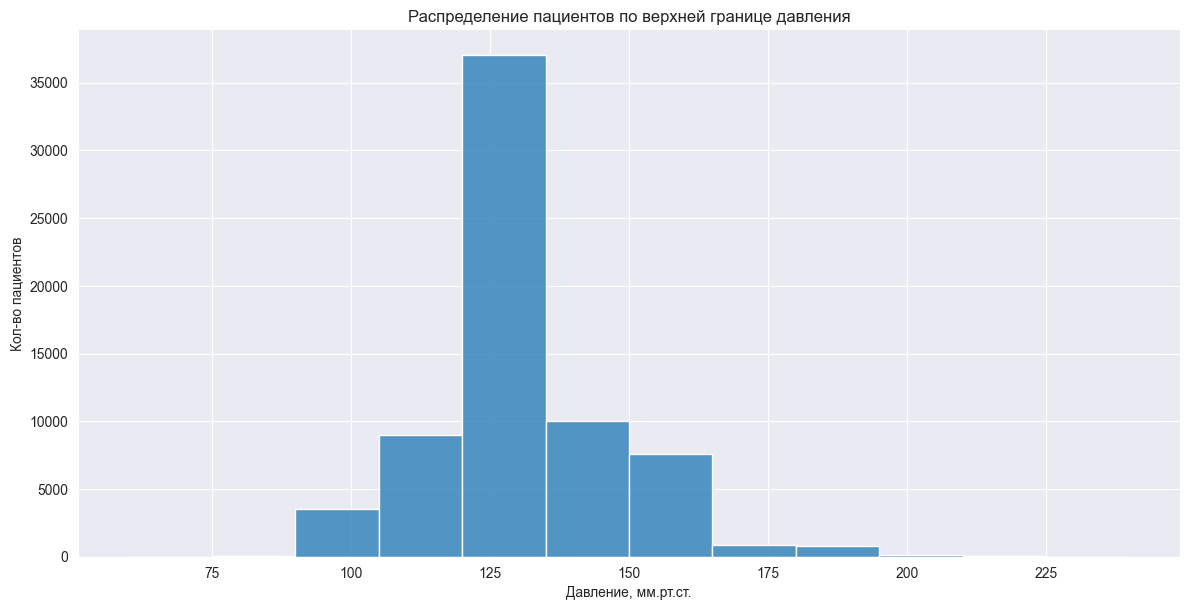

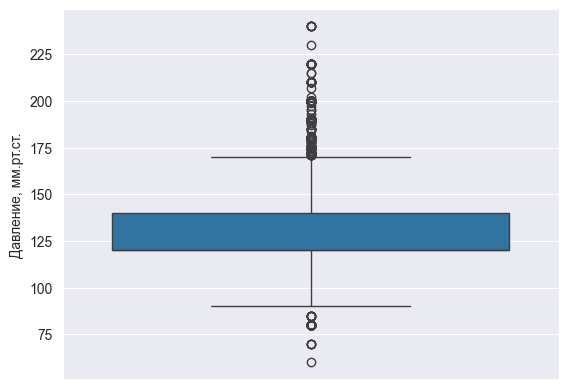

In [50]:
sns.displot(data=df['ap_hi'], height = 6, aspect = 12/6, bins = 12)
plt.title('Распределение пациентов по верхней границе давления')
plt.xlabel('Давление, мм.рт.ст.')
plt.ylabel('Кол-во пациентов')
plt.show()

sns.boxplot(data=df['ap_hi'])
plt.ylabel('Давление, мм.рт.ст.')
plt.show()

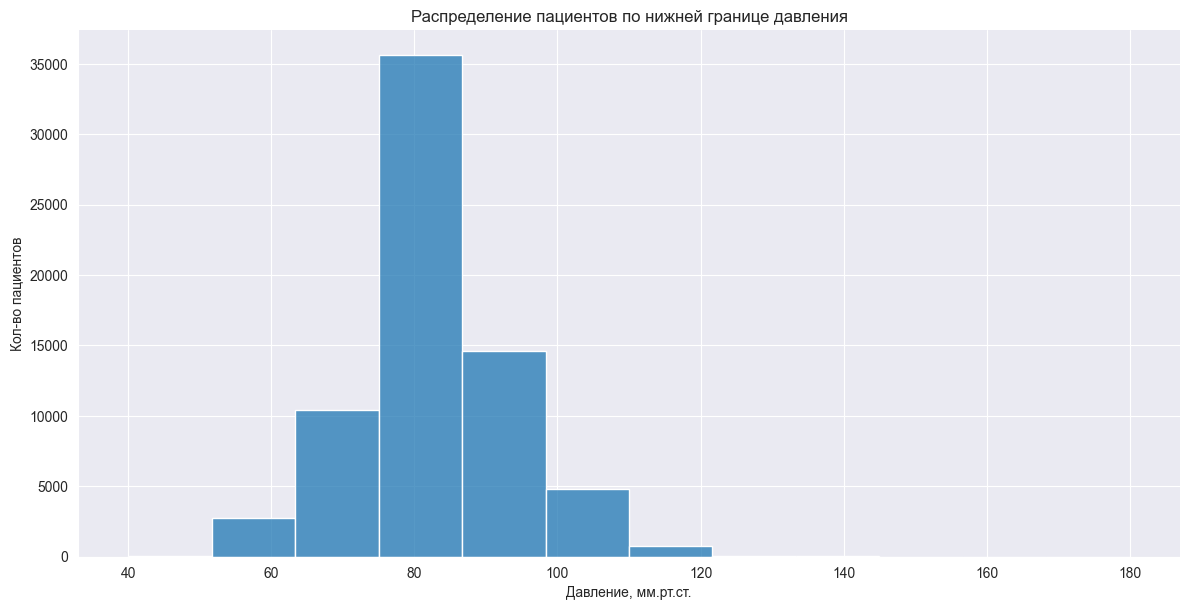

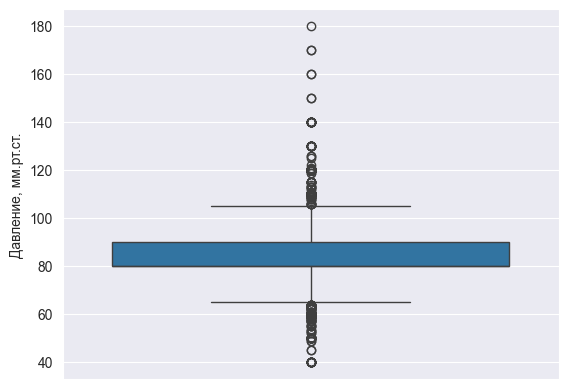

In [51]:
sns.displot(data=df['ap_lo'], height = 6, aspect = 12/6, bins = 12)
plt.title('Распределение пациентов по нижней границе давления')
plt.xlabel('Давление, мм.рт.ст.')
plt.ylabel('Кол-во пациентов')
plt.show()

sns.boxplot(data=df['ap_lo'])
plt.ylabel('Давление, мм.рт.ст.')
plt.show()

### bmi (индекс массы тела)

In [52]:
df.bmi.describe(percentiles=[0.05,0.25,0.5,0.75,0.9,0.95,0.999])

count    69098.000000
mean        27.446790
std          5.188287
min         10.700000
5%          21.000000
25%         23.900000
50%         26.300000
75%         30.100000
90%         34.400000
95%         37.200000
99.9%       53.290300
max         69.800000
Name: bmi, dtype: float64

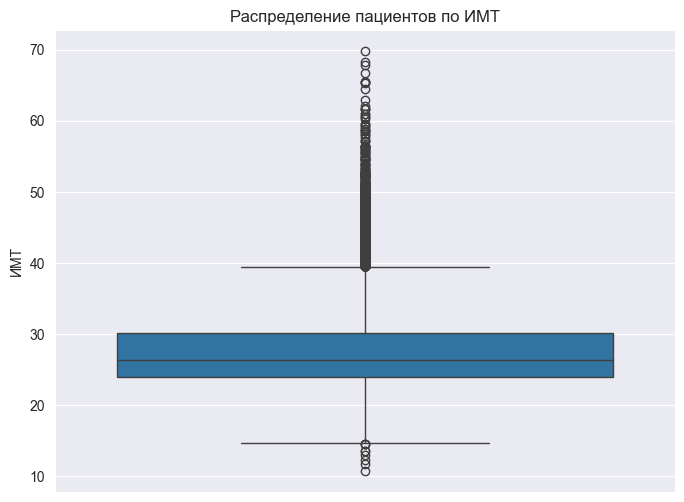

In [53]:
plt.figure(figsize=(8,6))
sns.boxplot(df['bmi'])
plt.title('Распределение пациентов по ИМТ')
plt.ylabel('ИМТ')
plt.xlabel('')
plt.show()

In [54]:
df.sort_values(by='bmi', ascending=False).head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
52564,53,Ж,161,181,180,110,повышенный,норма,некурящий,не употребляет,активен,болен,69.8,Ожирение 3 ст.
58175,59,Ж,154,162,120,80,норма,норма,некурящий,не употребляет,активен,не болен,68.3,Ожирение 3 ст.
27063,42,Ж,155,163,180,100,норма,норма,некурящий,не употребляет,активен,болен,67.8,Ожирение 3 ст.
53670,54,Ж,162,175,140,100,норма,норма,некурящий,не употребляет,активен,болен,66.7,Ожирение 3 ст.
28683,56,М,165,178,120,80,норма,норма,курящий,употребляет,активен,не болен,65.4,Ожирение 3 ст.


Такие значения роста и веса, а соответственно и ИМТ, довольно часто встречаются в жизни, соответственно, убирать эти значения не будем.

Для анализа необходимо достаточно большое кол-во пациентов с различными типами ИМТ, однако, в датасете представлено крайне мало данных по пациентам с дефицитом массы тела, поэтому исключим их из анализа.

In [55]:
df = df.query('bmi_type != "Дефицит"').copy()
df.shape

(69054, 14)

In [56]:
df.bmi_type.value_counts()

bmi_type
Избыток           25320
Норма             25228
Ожирение 1 ст.    12118
Ожирение 2 ст.     4311
Ожирение 3 ст.     1741
Недостаток          336
Name: count, dtype: int64

## Зависимость между факторами и наличием ССЗ

In [57]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_type
id,,,,,,,,,,,,,,
0,50,М,168,62,110,80,норма,норма,некурящий,не употребляет,активен,не болен,22.0,Норма
1,55,Ж,156,85,140,90,высокий,норма,некурящий,не употребляет,активен,болен,34.9,Ожирение 1 ст.
2,51,Ж,165,64,130,70,высокий,норма,некурящий,не употребляет,не активен,болен,23.5,Норма
3,48,М,169,82,150,100,норма,норма,некурящий,не употребляет,активен,болен,28.7,Избыток
4,47,Ж,156,56,100,60,норма,норма,некурящий,не употребляет,не активен,не болен,23.0,Норма


Для начала узнаем, сколько всего больных.

In [58]:
df.cardio.value_counts(normalize=True)

cardio
не болен    0.500912
болен       0.499088
Name: proportion, dtype: float64

Пациентов с ССЗ почти столько же, сколько и без ССЗ

Поскольку почти все данные категориальные, корреляционная матрица и диаграммы рассеяния не подойдут.  
Одним из важнейших факторов является ИМТ, поэтому осуществим дополнительные сравнения в разрезе нескольких факторов и ИМТ с наличием ССЗ.

### Зависимость между возрастом и наличием ССЗ

Посмотрим на средний возраст больных и здоровых

In [59]:
df.groupby('cardio')['age'].mean()

cardio
болен       54.437500
не болен    51.218127
Name: age, dtype: float64

Посмотрим на распределение по возрасту среди больных и здоровых

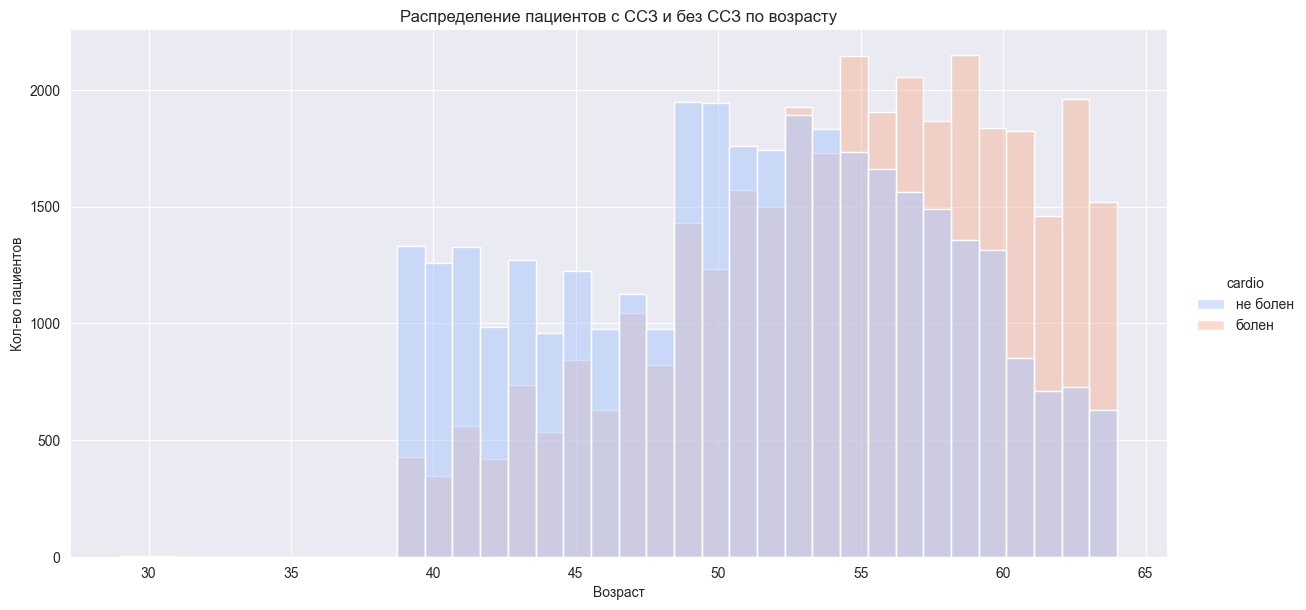

In [60]:
sns.displot(x='age', hue='cardio', data = df, height=6, aspect=12/6, palette='coolwarm', bins=36)
plt.title('Распределение пациентов с ССЗ и без ССЗ по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Кол-во пациентов')
plt.show()

**Вывод:**  
Средний возраст пациентов с наличием ССЗ на 3 года выше, чем у здоровых пациентов.  
Среди возрастных людей гораздо больше больных. Чем больше возраст, тем больше пациентов с ССЗ.

### Зависимость между полом и наличием ССЗ

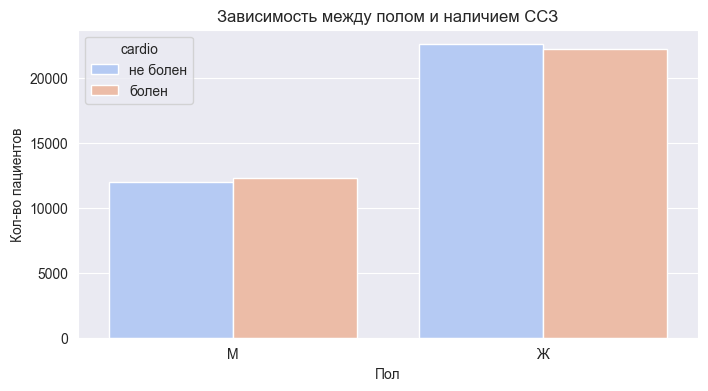

In [61]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, hue='cardio', x='gender', palette='coolwarm')
plt.title('Зависимость между полом и наличием ССЗ')
plt.xlabel('Пол')
plt.ylabel('Кол-во пациентов')
plt.show()

**Рассмотрим, влияет ли пол на средний возраст пациентов с наличием ССЗ.**

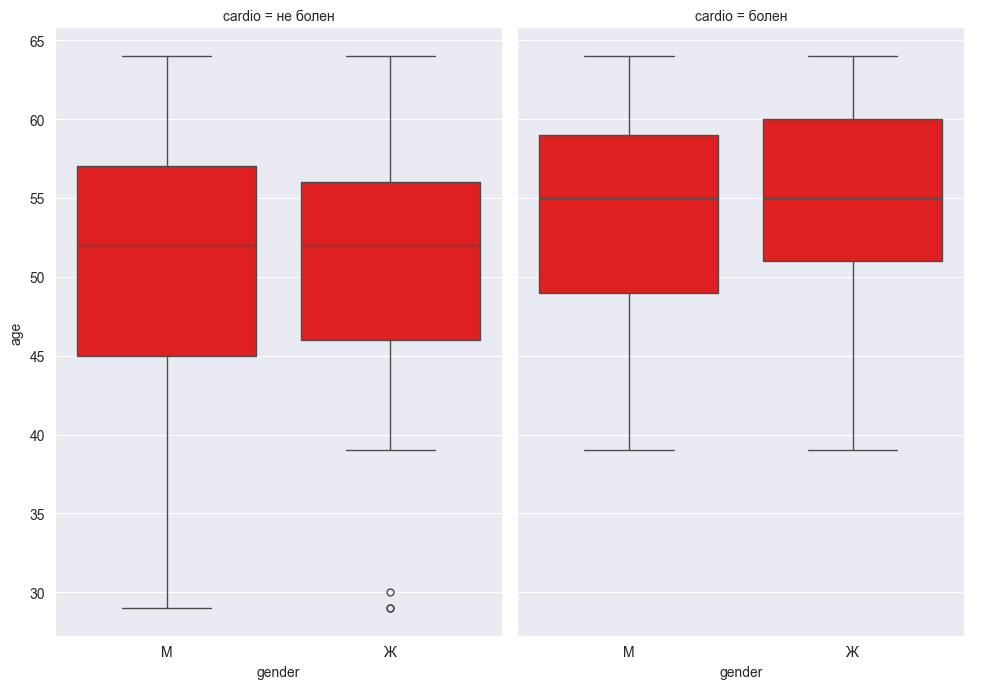

In [62]:
sns.catplot(x="gender", y="age", col="cardio", data=df, color = "red",kind="box", height=7, aspect=.7)
plt.show()

**Вывод:**  
Мужчины и женщины с одинаковой частотой имеют ССЗ.  
Пол не влияет на средний возраст заболеваемостью ССЗ.

### Зависимость между давлением и наличием ССЗ

**Рассмотрим зависимость между давлением и наличием ССЗ.**

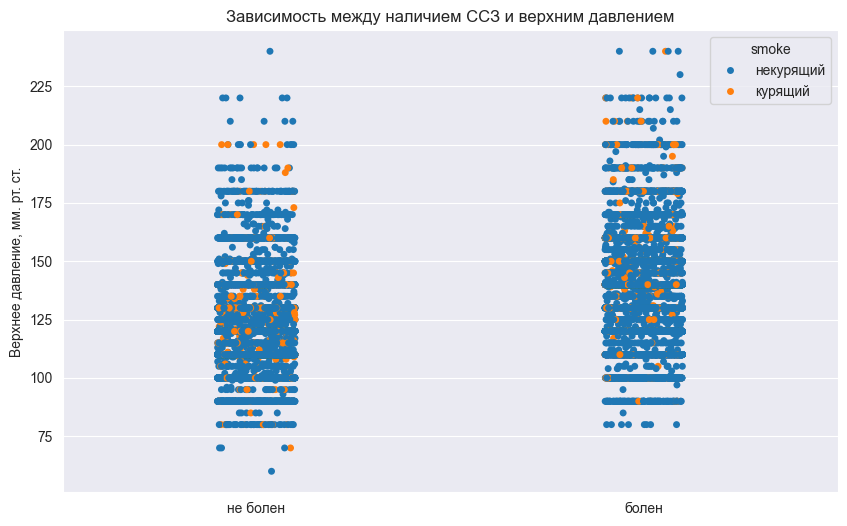

In [63]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='cardio', y='ap_hi', hue='smoke')
plt.title('Зависимость между наличием ССЗ и верхним давлением')
plt.xlabel('')
plt.ylabel('Верхнее давление, мм. рт. ст.')
plt.show()

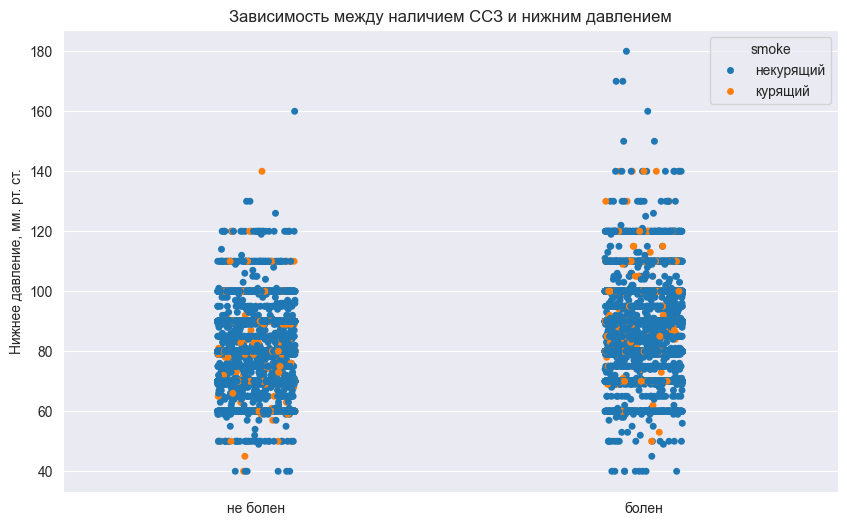

In [64]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='cardio', y='ap_lo', hue='smoke')
plt.title('Зависимость между наличием ССЗ и нижним давлением')
plt.xlabel('')
plt.ylabel('Нижнее давление, мм. рт. ст.')
plt.show()

**Вывод:**  
Для больных ССЗ в целом характерно более высокое давление.

### Зависимость между холестерином и наличием ССЗ

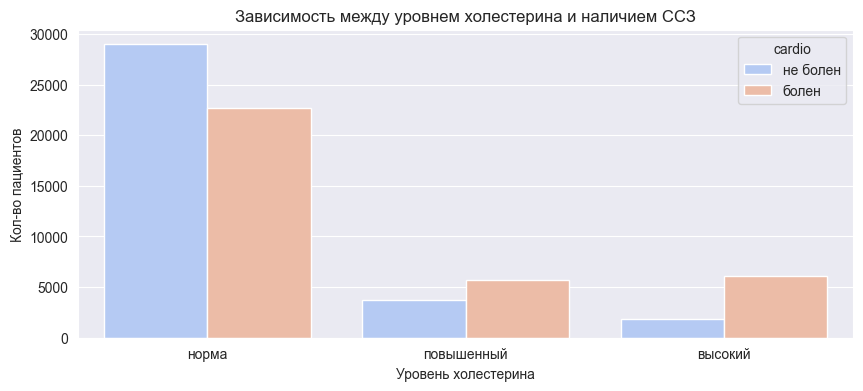

In [65]:
plt.figure(figsize=(10,4))
sns.countplot(x='cholesterol', hue='cardio', data=df,palette='coolwarm', order=['норма', 'повышенный', 'высокий'])
plt.title('Зависимость между уровнем холестерина и наличием ССЗ')
plt.xlabel('Уровень холестерина')
plt.ylabel('Кол-во пациентов')
plt.show()

**Рассмотрим влияние пола и уровня холестерина на ИМТ и наличие ССЗ.**

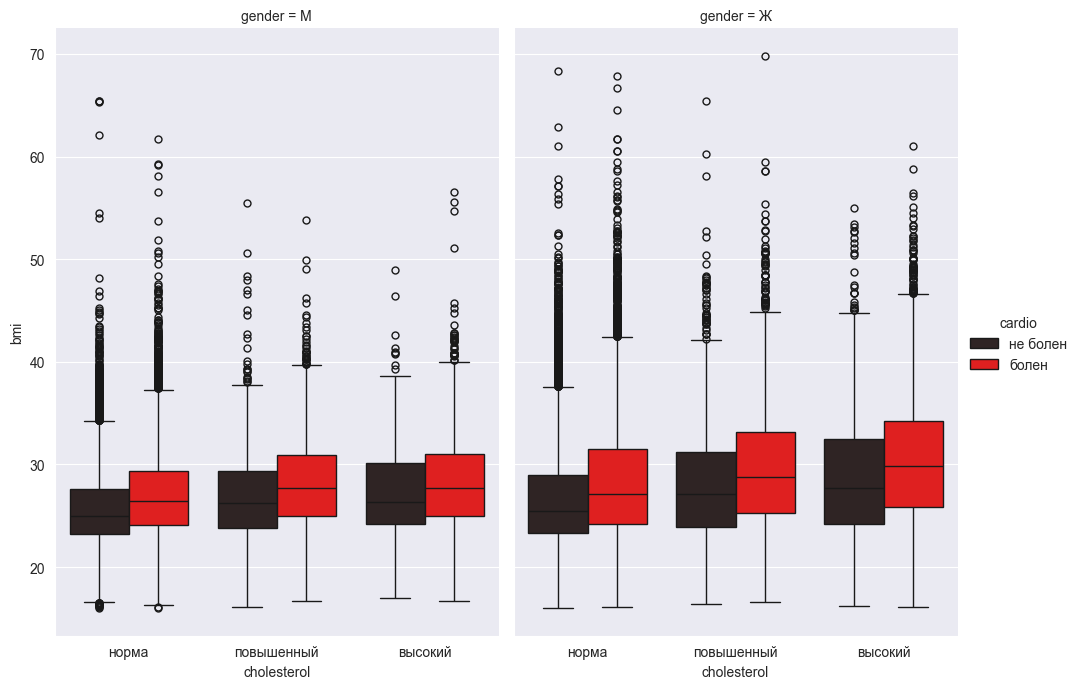

In [66]:
(sns.catplot(x="cholesterol", y="bmi", hue="cardio", col="gender", data=df, color = "red",kind="box", height=7, aspect=.7,
             order=['норма', 'повышенный', 'высокий'])
)
plt.show()

**Посмотрим как меняется холестерин от пола и возраста среди пациентов**

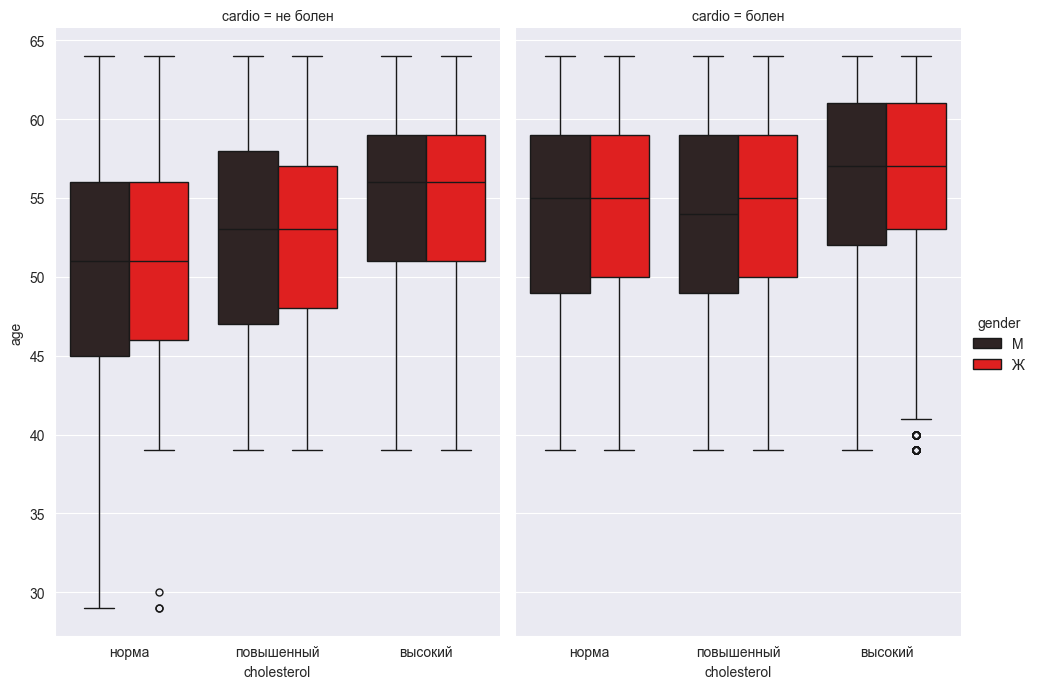

In [67]:
(sns.catplot(x="cholesterol", y="age", hue="gender", col="cardio", data=df, color = "red",kind="box", height=7, aspect=.7,
             order=['норма', 'повышенный', 'высокий'])
)
plt.show()

In [68]:
df.groupby(['gender', 'cholesterol'])['bmi'].mean()

gender  cholesterol
Ж       высокий        30.144218
        норма          27.299219
        повышенный     28.924813
М       высокий        28.069960
        норма          26.318170
        повышенный     27.748833
Name: bmi, dtype: float64

**Вывод:**  
Пациентов с ССЗ больше в группе с высоким и повышенным уровнем холестерина.  
Чем выше уровень холестерина, тем больше больных и меньше здоровых пациентов.  
Повышенный и высокий уровень холестерина встречаются чаще с увеличением возраста.

### Зависимость между уровнем глюкозы и наличием ССЗ

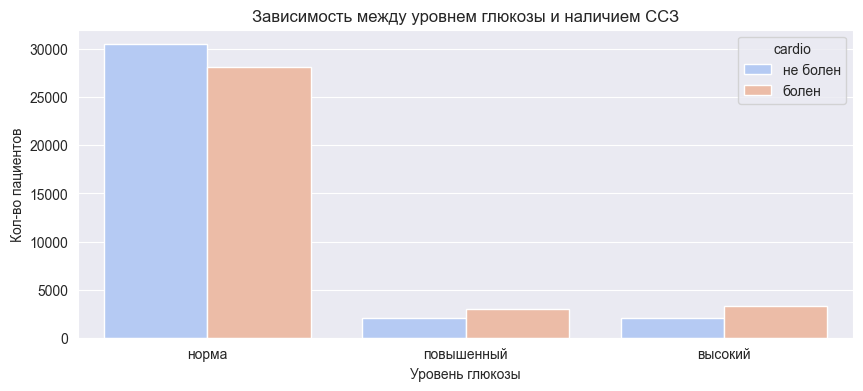

In [69]:
plt.figure(figsize=(10,4))
sns.countplot(x='gluc', hue='cardio', data=df,palette='coolwarm')
plt.title('Зависимость между уровнем глюкозы и наличием ССЗ')
plt.xlabel('Уровень глюкозы')
plt.ylabel('Кол-во пациентов')
plt.show()

**Рассмотрим подробнее зависимость между полом, уровнем глюкозы, наличием ССЗ и ИМТ.**

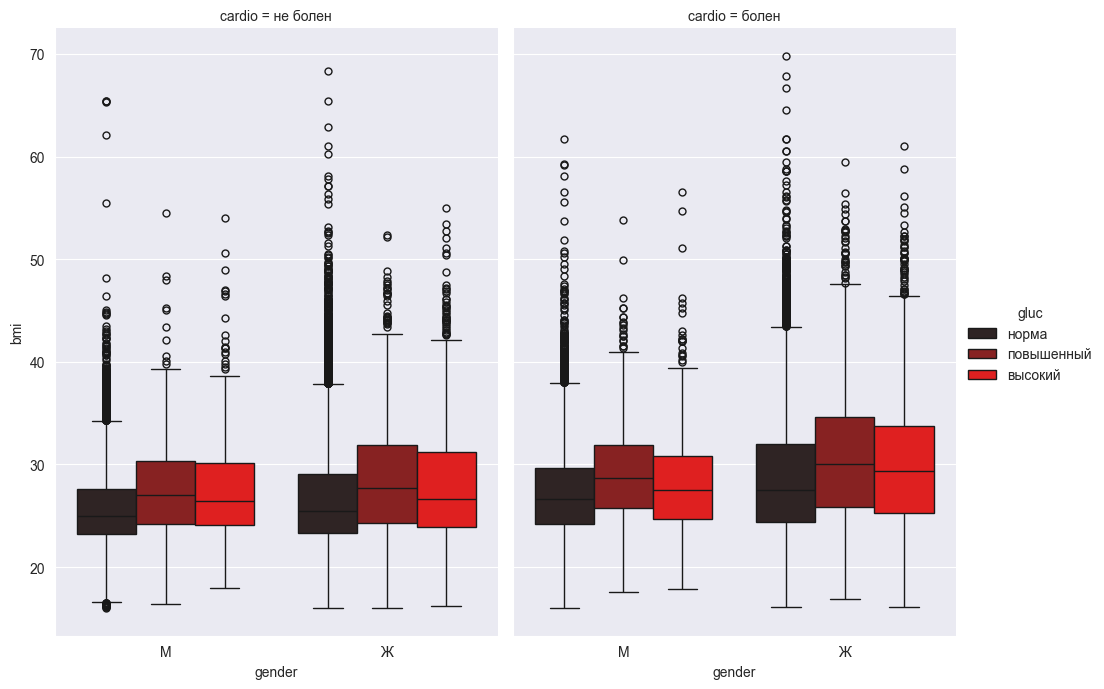

In [70]:
sns.catplot(x="gender", y="bmi", hue="gluc", col="cardio", data=df, color = "red", kind="box", height=7, aspect=.7)
plt.show()

**Рассмотрим подробнее зависимость уровня глюкозы, пола, возраста и наличия ССЗ.**

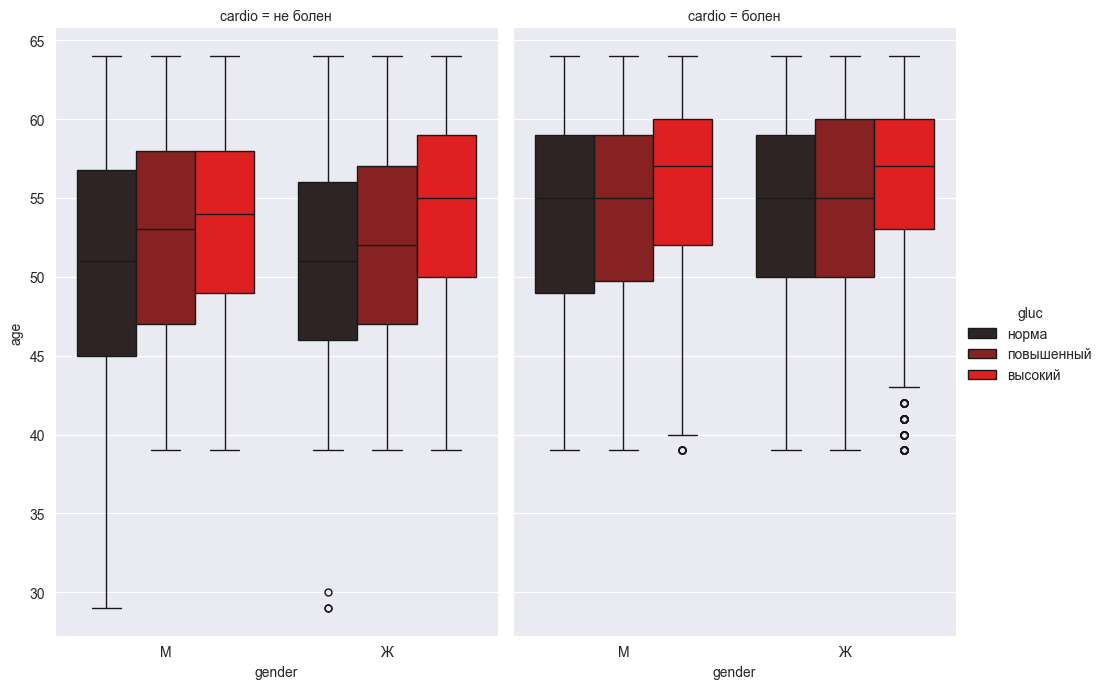

In [71]:
sns.catplot(x="gender", y="age", hue="gluc", col="cardio", data=df, color = "red", kind="box", height=7, aspect=.7)
plt.show()

**Вывод:**  
Среди пациентов с повышенным и высоким уровнем глюкозы больше больных ССЗ.  
Удивительно, что люди с повышенной глюкозой имеют бОльший ИМТ, чем люди с высоким уровнем глюкозы.  
Чем старше пациент, тем больше вероятность повышенного или высокого уровня глюкозы.

### Зависимость между курением и наличием ССЗ

Для начала посмотрим на долю курящих

In [72]:
df.smoke.value_counts(normalize=True)

smoke
некурящий    0.911359
курящий      0.088641
Name: proportion, dtype: float64

Среди пациентов всего около 9% курящих

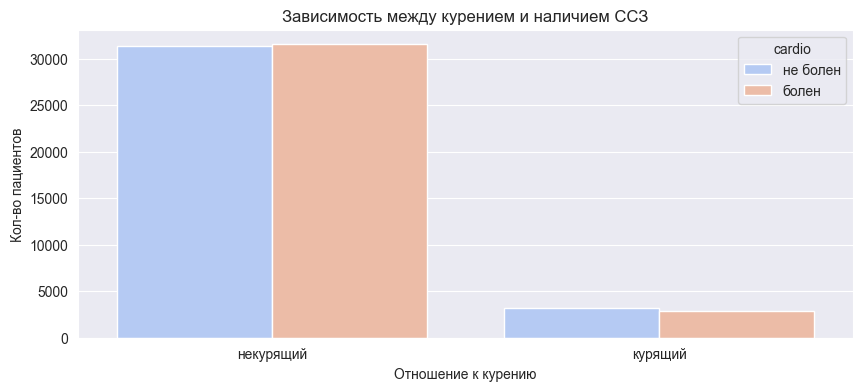

In [73]:
plt.figure(figsize=(10,4))
sns.countplot(x='smoke', hue='cardio', data=df, palette='coolwarm')
plt.title('Зависимость между курением и наличием ССЗ')
plt.xlabel('Отношение к курению')
plt.ylabel('Кол-во пациентов')
plt.show()

**Подробнее рассмотрим зависимость между полом, курением, ИМТ и наличием ССЗ.**

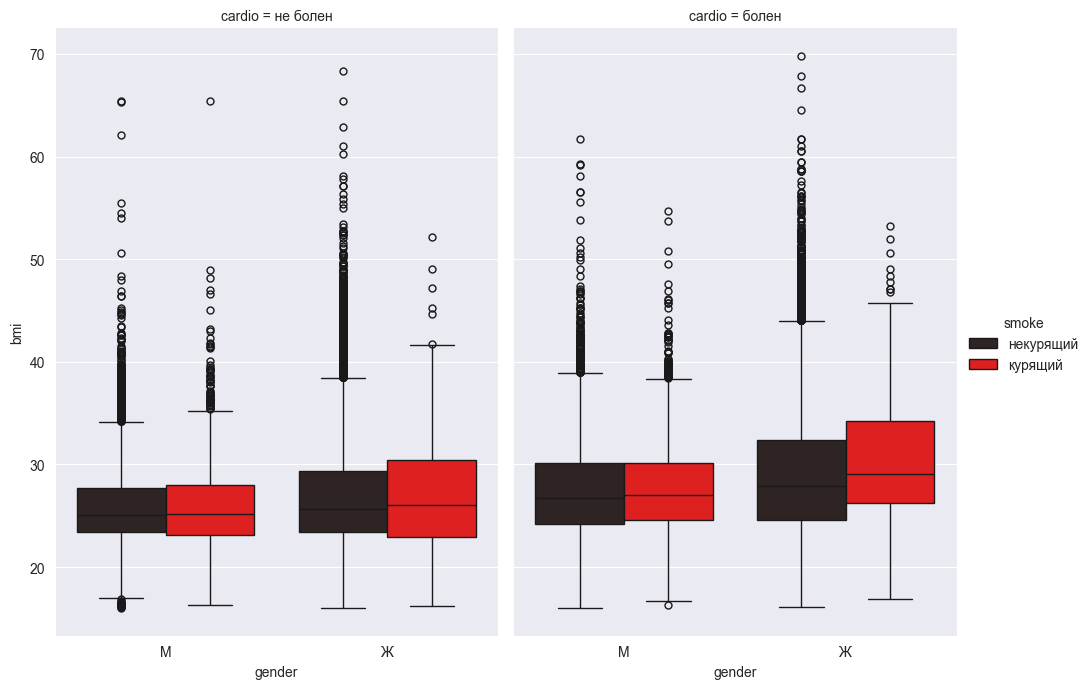

In [74]:
sns.catplot(x="gender", y="bmi", hue="smoke", col="cardio", data=df, color = "red",kind="box", height=7, aspect=.7)
plt.show()

In [75]:
df.groupby(['gender', 'smoke'])['bmi'].mean().reset_index()

,gender,smoke,bmi
0,Ж,курящий,28.716979
1,Ж,некурящий,27.858214
2,М,курящий,26.671974
3,М,некурящий,26.685027


**Вывод:**  
Нет какой-либо выраженной зависимости между курением и заболеваемостью ССЗ.  
При этом курящие женщины c ССЗ , в отличие от мужчин, имеют повышенную массу тела.

### Зависимость между употреблением алкоголя и наличием ССЗ

In [76]:
df.alco.value_counts()

alco
не употребляет    65346
употребляет        3708
Name: count, dtype: int64

In [77]:
df.alco.value_counts(normalize=True)

alco
не употребляет    0.946303
употребляет       0.053697
Name: proportion, dtype: float64

Среди пациентов всего 5% употребляющих алкоголь

In [78]:
df.pivot_table(index='alco', columns='gender', values='age', aggfunc='count')

gender,Ж,М
alco,,
не употребляет,43649,21697
употребляет,1131,2577


При этом мужчины чаще употребляют алкоголь

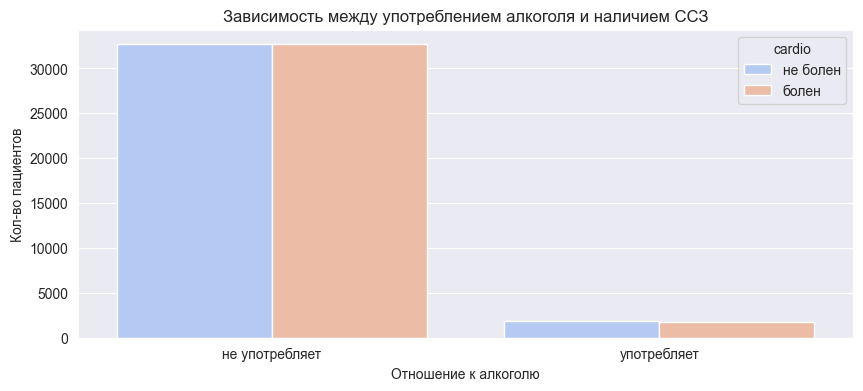

In [79]:
plt.figure(figsize=(10,4))
sns.countplot(x='alco', hue='cardio', data=df, palette='coolwarm')
plt.title('Зависимость между употреблением алкоголя и наличием ССЗ')
plt.xlabel('Отношение к алкоголю')
plt.ylabel('Кол-во пациентов')
plt.show()

**Подробнее рассмотрим зависимость между полом, употреблением алкоголя, ИМТ и наличием ССЗ.**

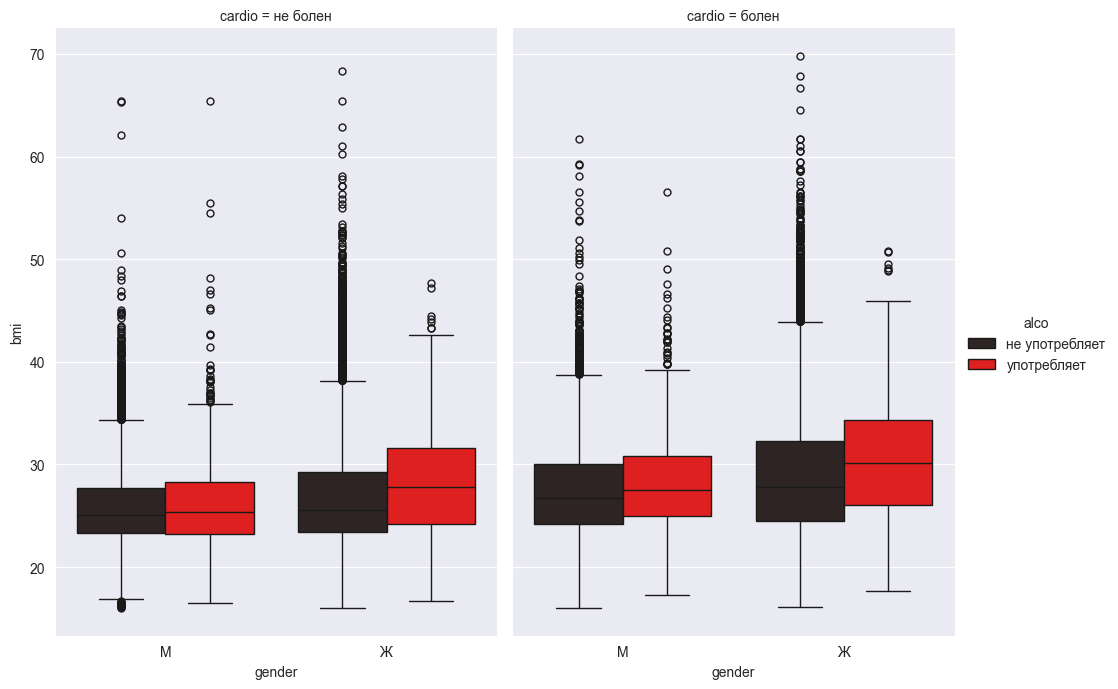

In [80]:
sns.catplot(x="gender", y="bmi", hue="alco", col="cardio", data=df, color = "red",kind="box", height=7, aspect=.7)
plt.show()

In [81]:
df.groupby(['gender', 'alco'])['bmi'].mean().reset_index()

,gender,alco,bmi
0,Ж,не употребляет,27.829625
1,Ж,употребляет,29.569761
2,М,не употребляет,26.634000
3,М,употребляет,27.087699


**Вывод:**  
Нет какой-либо выраженной зависимости между употреблением алкоголя и наличием ССЗ.  
Однако у людей, употребляющих алкоголь, выше ИМТ, влияние которого на наличие ССЗ рассмотрим далее.  
При этом, женщины, употребляющие алкоголь, более склонны к увеличенному ИМТ, чем мужчины.  

### Зависимость между физ. активностью и наличием ССЗ

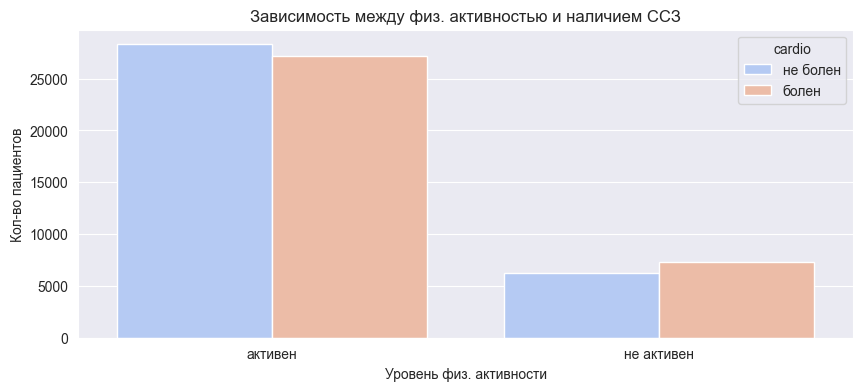

In [82]:
plt.figure(figsize=(10,4))
sns.countplot(x='active', hue='cardio', data=df, palette='coolwarm')
plt.title('Зависимость между физ. активностью и наличием ССЗ')
plt.xlabel('Уровень физ. активности')
plt.ylabel('Кол-во пациентов')
plt.show()

**Рассмотрим зависимость между активностью, полом, ИМТ и наличием ССЗ**.

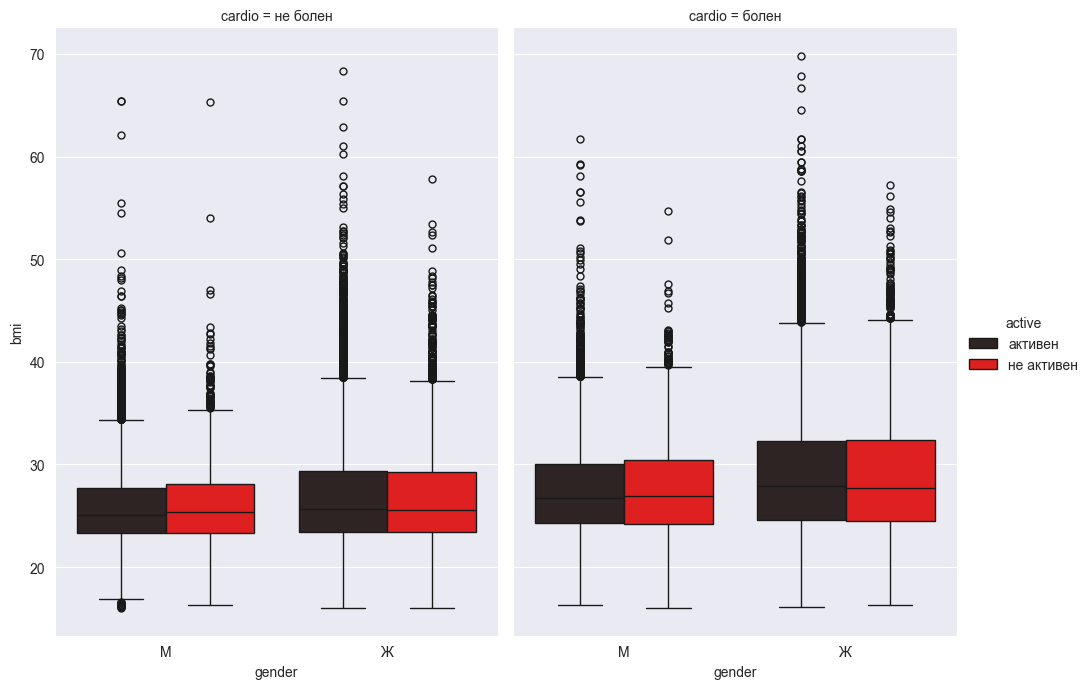

In [83]:
sns.catplot(x="gender", y="bmi", hue="active", col="cardio", data=df, color = "red",kind="box", height=7, aspect=.7)
plt.show()

**Вывод:**   
Физ. активность не влияет ни на наличие ССЗ, ни на ИМТ.

### Зависимость между ИМТ и наличием ССЗ

In [84]:
df.bmi_type.value_counts(normalize=True)

bmi_type
Избыток           0.366670
Норма             0.365337
Ожирение 1 ст.    0.175486
Ожирение 2 ст.    0.062429
Ожирение 3 ст.    0.025212
Недостаток        0.004866
Name: proportion, dtype: float64

В основном, пациенты имеют нормальную или избыточную массу тела. Реже всего встречается ярко выраженный дефицит массы тела.

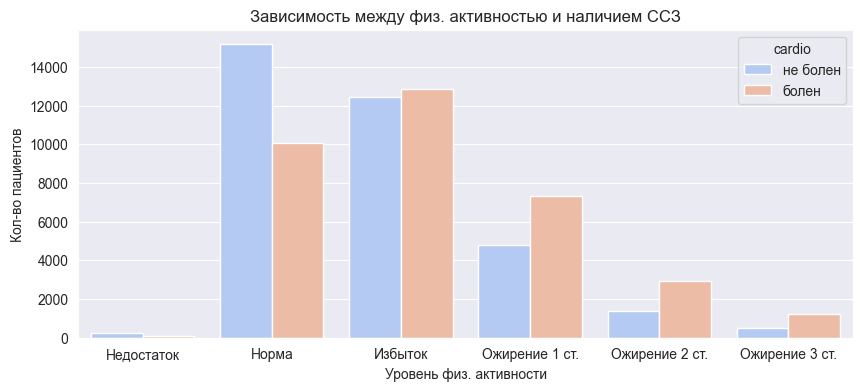

In [85]:
plt.figure(figsize=(10,4))
(sns.countplot(x='bmi_type', hue='cardio', data=df, palette='coolwarm',
               order = ['Недостаток', 'Норма', 'Избыток', 'Ожирение 1 ст.', 'Ожирение 2 ст.', 'Ожирение 3 ст.'])
)
plt.title('Зависимость между физ. активностью и наличием ССЗ')
plt.xlabel('Уровень физ. активности')
plt.ylabel('Кол-во пациентов')
plt.show()

In [86]:
bmi_df = df.pivot_table(index='cardio', columns='bmi_type', values='bmi', aggfunc='count')

# строк с кол-вом пациентов с ССЗ на 1 здорового
bmi_df.loc[len(bmi_df.index)] = bmi_df.iloc[0]/bmi_df.iloc[1]
bmi_df

bmi_type,Избыток,Недостаток,Норма,Ожирение 1 ст.,Ожирение 2 ст.,Ожирение 3 ст.
cardio,,,,,,
болен,12867.000000,84.000000,10068.000000,7307.000000,2922.000000,1216.00000
не болен,12453.000000,252.000000,15160.000000,4811.000000,1389.000000,525.00000
2,1.033245,0.333333,0.664116,1.518811,2.103672,2.31619


**Рассмотрим зависимость пола, возраста, типа ИМТ и наличия ССЗ.**

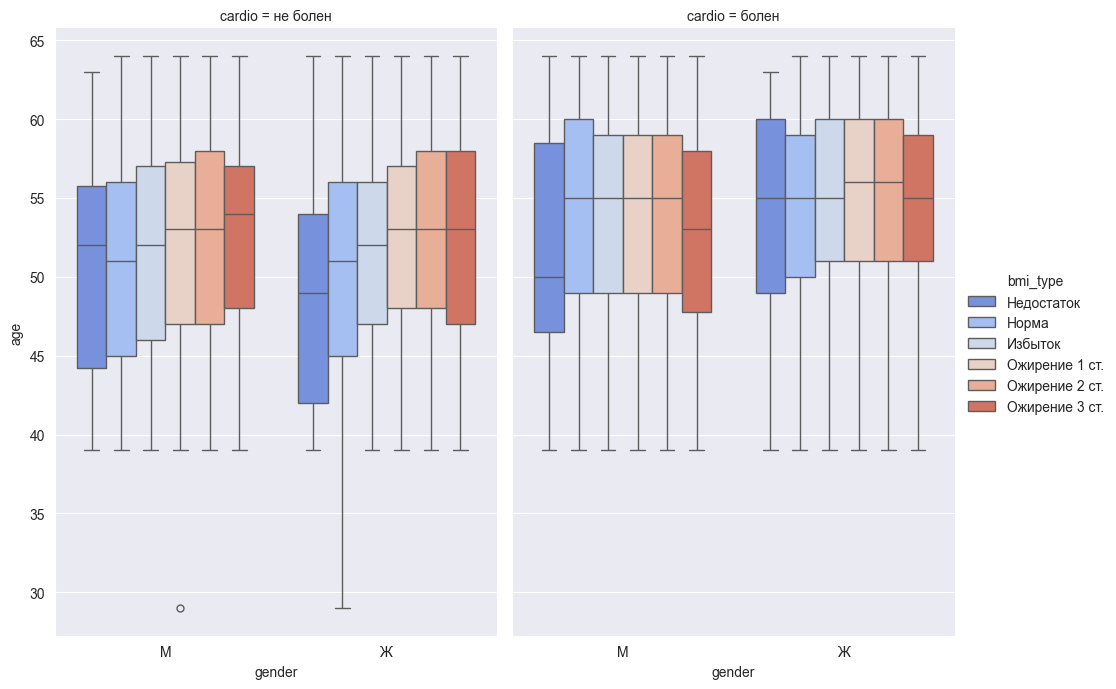

In [87]:
(sns.catplot(x="gender", y="age", hue="bmi_type", col="cardio", data=df, palette = "coolwarm", kind="box", height=7, aspect=.7,
            hue_order=['Недостаток', 'Норма', 'Избыток', 'Ожирение 1 ст.', 'Ожирение 2 ст.', 'Ожирение 3 ст.'])
)
plt.show()

In [88]:
df.groupby(['gender', 'bmi_type'])['age'].count()

gender  bmi_type      
Ж       Избыток           15503
        Недостаток          231
        Норма             15699
        Ожирение 1 ст.     8434
        Ожирение 2 ст.     3393
        Ожирение 3 ст.     1520
М       Избыток            9817
        Недостаток          105
        Норма              9529
        Ожирение 1 ст.     3684
        Ожирение 2 ст.      918
        Ожирение 3 ст.      221
Name: age, dtype: int64

**Посмотрим на влияние типа ИМТ на вехнюю границу давления по полу и наличию ССЗ.**

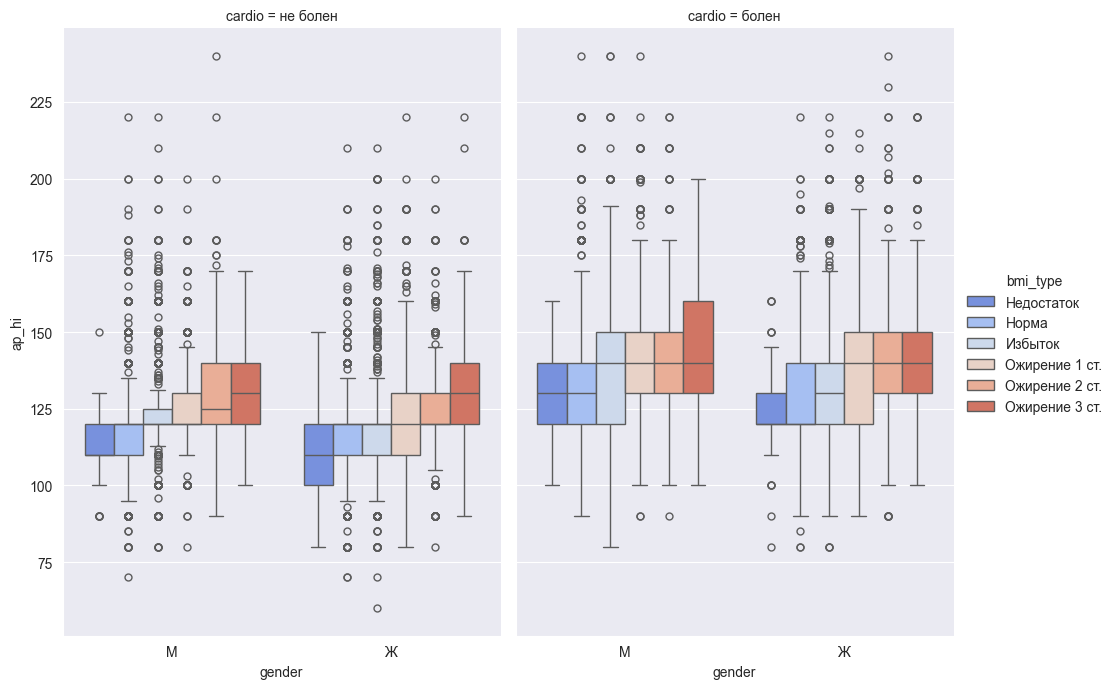

In [89]:
(sns.catplot(x="gender", y="ap_hi", hue="bmi_type", col="cardio", data=df, palette = "coolwarm", kind="box", height=7, aspect=.7,
            hue_order=['Недостаток', 'Норма', 'Избыток', 'Ожирение 1 ст.', 'Ожирение 2 ст.', 'Ожирение 3 ст.'])
)
plt.show()

**Посмотрим на влияние типа ИМТ на нижнюю границу давления по полу и наличию ССЗ.**

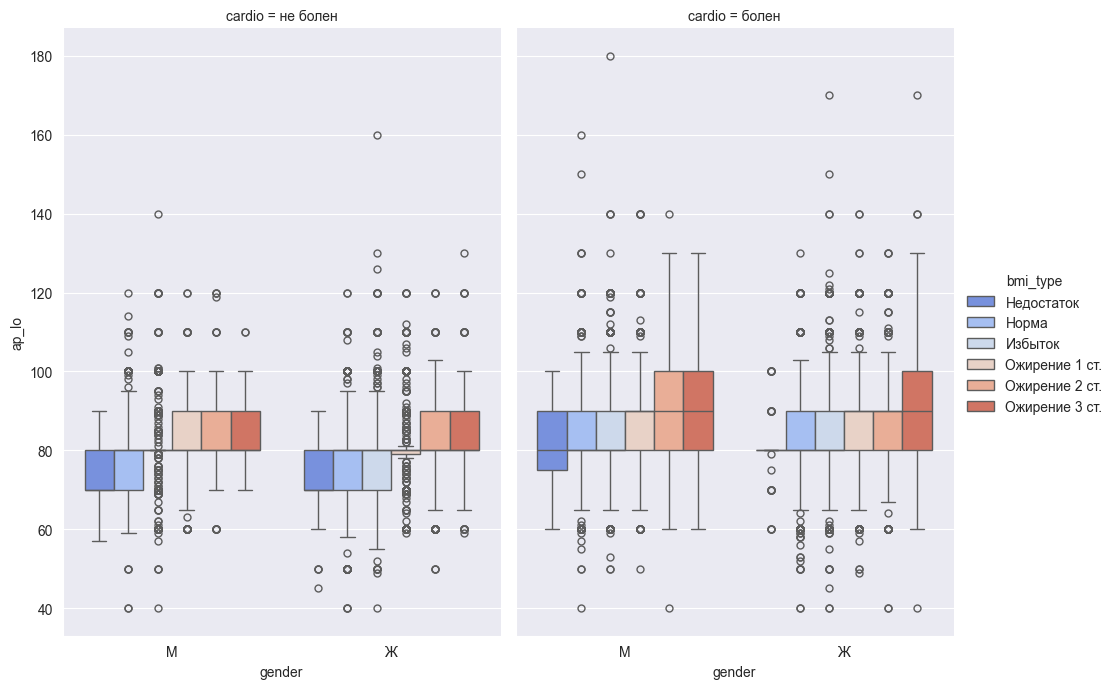

In [90]:
(sns.catplot(x="gender", y="ap_lo", hue="bmi_type", col="cardio", data=df, palette = "coolwarm", kind="box", height=7, aspect=.7,
            hue_order=['Недостаток', 'Норма', 'Избыток', 'Ожирение 1 ст.', 'Ожирение 2 ст.', 'Ожирение 3 ст.'])
)
plt.show()

**Вывод:**  
Масса тела определённо влияет на наличие ССЗ. Чем выше масса тела, тем больше пациентов с ССЗ.  
Мужчины с выраженным недостатком массы тела и ожирением 3 степени гораздо раньше заболевают ССЗ (так, 2 из 3 пациентов с ожирением 3 ст. больны ССЗ).  
Чем больше ИМТ, тем более высокое давление характерно для пациента.  

### ВЫВОД

- Средний возраст пациентов с наличием ССЗ (54 года) на 3 года выше, чем у здоровых пациентов (51).  
- Среди возрастных людей гораздо больше больных. Чем больше возраст, тем больше пациентов с ССЗ.  
- Мужчины и женщины с одинаковой частотой имеют ССЗ. Пол не влияет на средний возраст заболеваемостью ССЗ.  
- Для больных ССЗ в целом характерно более высокое давление.
- Пациентов с ССЗ больше в группе с высоким и повышенным уровнем холестерина.  Чем выше уровень холестерина, тем больше больных и меньше здоровых пациентов.  
- Повышенный и высокий уровень холестерина встречаются чаще с увеличением возраста.  
- Среди пациентов с повышенным и высоким уровнем глюкозы больше больных ССЗ. Чем старше пациент, тем больше вероятность повышенного или высокого уровня глюкозы.  
- Нет какой-либо выраженной зависимости между курением и заболеваемостью ССЗ. При этом курящие женщины c ССЗ , в отличие от мужчин, имеют повышенную массу тела.  
- Нет какой-либо выраженной зависимости между употреблением алкоголя и наличием ССЗ. Однако у людей, употребляющих алкоголь, выше ИМТ. При этом, женщины, употребляющие алкоголь, более склонны к увеличенному ИМТ, чем мужчины.   
- Физ. активность не влияет ни на наличие ССЗ, ни на ИМТ.
- Масса тела (а соответственно и ИМТ) определённо влияет на наличие ССЗ. Чем выше масса тела, тем больше пациентов с ССЗ.
- Мужчины с выраженным недостатком массы тела и ожирением 3 степени гораздо раньше заболевают ССЗ (так, 2 из 3 пациентов с ожирением 3 ст. больны ССЗ). Чем больше ИМТ, тем более высокое давление характерно для пациента.

**РЕКОМЕНДАЦИИ:**  
1) Периодически проводить профилактику кровяного давления.  
2) Следить за уровнем холестерина и глюкозы.  
3) Пьющим пациентам (особенно женщинам) и курящим женщинам стоит следить за массой тела и не доводить значения ИМТ, выше избыточных.  
4) Держать массу тела в рекомендуемых пределах (желательно в норме - ИМТ от 18.5 до 25). Если показатели ИМТ, хаарктерные для избыточной массы тела, ещё приемлемы, то доводить до ожирения любой степени опасно.

## Портрет типичного пациента

In [91]:
df.groupby(['cardio', 'gender'])[['age', 'ap_hi', 'ap_lo', 'bmi']].mean()

age       ap_hi      ap_lo        bmi
cardio   gender                                             
болен    Ж       54.637375  133.720160  84.540942  28.966953
         М       54.075599  135.661801  85.691241  27.532295
не болен Ж       51.250244  118.892329  77.694747  26.798406
         М       51.157759  121.277306  79.213037  25.814344

In [92]:
df.groupby(['cardio', 'gender'])['gender'].count()

cardio    gender
болен     Ж         22202
          М         12262
не болен  Ж         22578
          М         12012
Name: gender, dtype: int64

In [93]:
df.groupby(['cardio', 'gender', 'cholesterol'])['cholesterol'].count()

cardio    gender  cholesterol
болен     Ж       высокий         4193
                  норма          14340
                  повышенный      3669
          М       высокий         1876
                  норма           8394
                  повышенный      1992
не болен  Ж       высокий         1255
                  норма          18705
                  повышенный      2618
          М       высокий          614
                  норма          10263
                  повышенный      1135
Name: cholesterol, dtype: int64

In [94]:
df.groupby(['cardio', 'gender', 'gluc'])['gluc'].count()

cardio    gender  gluc      
болен     Ж       высокий        2270
                  норма         17986
                  повышенный     1946
          М       высокий         983
                  норма         10199
                  повышенный     1080
не болен  Ж       высокий        1312
                  норма         19849
                  повышенный     1417
          М       высокий         690
                  норма         10646
                  повышенный      676
Name: gluc, dtype: int64

In [95]:
df.groupby(['cardio', 'gender', 'smoke'])['smoke'].count()

cardio    gender  smoke    
болен     Ж       курящий        381
                  некурящий    21821
          М       курящий       2523
                  некурящий     9739
не болен  Ж       курящий        420
                  некурящий    22158
          М       курящий       2797
                  некурящий     9215
Name: smoke, dtype: int64

In [96]:
df.groupby(['cardio', 'gender', 'alco'])['alco'].count()

cardio    gender  alco          
болен     Ж       не употребляет    21644
                  употребляет         558
          М       не употребляет    11028
                  употребляет        1234
не болен  Ж       не употребляет    22005
                  употребляет         573
          М       не употребляет    10669
                  употребляет        1343
Name: alco, dtype: int64

In [97]:
df.groupby(['cardio', 'gender', 'active'])['active'].count()

cardio    gender  active    
болен     Ж       активен       17532
                  не активен     4670
          М       активен        9671
                  не активен     2591
не болен  Ж       активен       18388
                  не активен     4190
          М       активен        9921
                  не активен     2091
Name: active, dtype: int64

### Типичный мужчина без ССЗ
51 год, давление 121 на 79, ИМТ 25.8 (небольшой избыток массы тела), нормальный холестерин и уровень глюкозы, не курит, не употребляет алкоголь, физически активен

### Типичная женщина без ССЗ
51 год, давление 119 на 78, ИМТ 26.8 (небольшой избыток массы тела), нормальный холестерин и уровень глюкозы, не курит, не употребляет алкоголь, физически активна

### Типичный мужчина с ССЗ
54 года, давление 136 на 86, ИМТ 27.5 (избыток массы тела), нормальный холестерин и уровень глюкозы, не курит, не употребляет алкоголь, физически активен

### Типичная женщина с ССЗ
54 года, давление 134 на 85, ИМТ 29 (избыток массы тела), нормальный холестерин и уровень глюкозы, не курит, не употребляет алкоголь, физически активна

## Проверка гипотез

Установим уровень статистической значимости 0.05

In [98]:
alpha = 0.05

### Разница в возрасте между больными и здоровыми пациентами

Гипотеза H0: возраст группы пациентов с ССЗ и пациентов без ССЗ не отличается.  
Гипотеза H1: возраст группы пациентов с ССЗ выше, чем у группы без ССЗ.  

Создадим датафреймы с искомыми параметрами

In [99]:
df_cvd = df.query('cardio == "болен"')
df_notcvd = df.query('cardio == "не болен"')

In [100]:
display(df_cvd.index.nunique())
df_notcvd.index.nunique()

34464

34590

Размеры выборок практически идентичны

Проверим нормальность распределения при помощи критерия Шапиро-Уилка

In [101]:
means_fic = []
n = 1
 
while n < 500:
    n += 1
    sample = df[df['cardio'] == "не болен"].sample(10000)['age'].mean()
    means_fic.append(sample)

In [102]:
shapiro(means_fic)

ShapiroResult(statistic=0.9962496757507324, pvalue=0.2897244691848755)

Нет оснований утверждать, что распределение ненормально.

In [103]:
means_fic_2 = []
n = 1
 
while n < 500:
    n += 1
    sample = df[df['cardio'] == "болен"].sample(10000)['age'].mean()
    means_fic_2.append(sample)

In [104]:
shapiro(means_fic_2)

ShapiroResult(statistic=0.9973956942558289, pvalue=0.6264110803604126)

Нет оснований утверждать, что распределение ненормально.

Судя по всему, распределение близко к нормальному, хотя в возрасте и присутствует длинный хвост крайних значений

Проверим предположение о равенстве дисперсий при помощи критерия Левене

In [105]:
w_stats, p_value = levene(df_notcvd.age.sample(20000), df_cvd.age.sample(20000))
display(levene(df_notcvd.bmi.sample(20000), df_cvd.bmi.sample(20000)))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

LeveneResult(statistic=382.11644065888055, pvalue=1.0717328657758112e-84)

Отвергаем нулевую гипотезу


Тест показал значимые различия в дисперсиях

In [106]:
df_notcvd.age.describe()

count    34590.000000
mean        51.218127
std          6.778278
min         29.000000
25%         46.000000
50%         52.000000
75%         56.000000
max         64.000000
Name: age, dtype: float64

In [107]:
df_cvd.age.describe()

count    34464.000000
mean        54.437500
std          6.358523
min         39.000000
25%         50.000000
50%         55.000000
75%         59.000000
max         64.000000
Name: age, dtype: float64

Проведём ttest

In [108]:
# правосторонний тест с предположением о неравенстве дисперсий
result = st.ttest_ind(df_cvd['age'], df_notcvd['age'], alternative='greater', equal_var=False)

print(f'p-value: {result.pvalue}')
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value: 0.0
Отвергаем нулевую гипотезу


**Вывод:**  
Есть статистически значимые основания утверждать, что средний возраст пациентов с ССЗ выше, чем у здоровых.

### Разница ИМТ между больными и здоровыми пациентами

Н0: ИМТ у здоровых пациентов и ИМТ у пациентов с ССЗ равны.  
Н1: ИМТ у пациентов с ССЗ выше, чем у здоровых пациентов.

Проверим нормальность распределения.

In [109]:
means_fic = []
n = 1
 
while n < 500:
    n += 1
    sample = df[df['cardio'] == "не болен"].sample(10000)['bmi'].mean()
    means_fic.append(sample)

In [110]:
shapiro(means_fic)

ShapiroResult(statistic=0.9967530369758606, pvalue=0.4176977276802063)

Нет оснований утверждать, что распределение ненормально.

In [111]:
means_fic_2 = []
n = 1
 
while n < 500:
    n += 1
    sample = df[df['cardio'] == "болен"].sample(10000)['bmi'].mean()
    means_fic_2.append(sample)

In [112]:
shapiro(means_fic_2)

ShapiroResult(statistic=0.9958329796791077, pvalue=0.20971427857875824)

Нет оснований утверждать, что распределение ненормально.

Проверим гипотезу о равенстве дисперсий

In [113]:
w_stats, p_value = levene(df_notcvd.bmi.sample(20000), df_cvd.bmi.sample(20000))
display(levene(df_notcvd.bmi.sample(20000), df_cvd.bmi.sample(20000)))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

LeveneResult(statistic=374.51953548386837, pvalue=4.662015404285604e-83)

Отвергаем нулевую гипотезу


Тест показал значимые различия в дисперсиях

In [114]:
df_notcvd.bmi.describe()

count    34590.000000
mean        26.456672
std          4.727379
min         16.000000
25%         23.400000
50%         25.500000
75%         28.700000
max         68.300000
Name: bmi, dtype: float64

In [115]:
df_cvd.bmi.describe()

count    34464.000000
mean        28.456514
std          5.416180
min         16.000000
25%         24.500000
50%         27.400000
75%         31.500000
max         69.800000
Name: bmi, dtype: float64

Проведём правосторонний ttest с предположением о неравенстве дисперсий.

In [116]:
result_bmi = st.ttest_ind(df_cvd['bmi'].values, df_notcvd['bmi'].values, alternative='greater', equal_var=False)

print(f'p-value: {result_bmi.pvalue}')
if result_bmi.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value: 0.0
Отвергаем нулевую гипотезу


**Вывод:**  
Есть статистически значимые основания утверждать, что средний ИМТ пациентов с ССЗ выше, чем у здоровых.

## ОБЩИЙ ВЫВОД

- Средний возраст пациентов с наличием ССЗ (54 года) на 3 года выше, чем у здоровых пациентов (51).  
- Среди возрастных людей гораздо больше больных. Чем больше возраст, тем больше пациентов с ССЗ.  
- Мужчины и женщины с одинаковой частотой имеют ССЗ. Пол не влияет на средний возраст заболеваемостью ССЗ.  
- Для больных ССЗ в целом характерно более высокое давление.
- Пациентов с ССЗ больше в группе с высоким и повышенным уровнем холестерина.  Чем выше уровень холестерина, тем больше больных и меньше здоровых пациентов.  
- Повышенный и высокий уровень холестерина встречаются чаще с увеличением возраста.  
- Среди пациентов с повышенным и высоким уровнем глюкозы больше больных ССЗ. Чем старше пациент, тем больше вероятность повышенного или высокого уровня глюкозы.  
- Нет какой-либо выраженной зависимости между курением и заболеваемостью ССЗ. При этом курящие женщины c ССЗ , в отличие от мужчин, имеют повышенную массу тела.  
- Нет какой-либо выраженной зависимости между употреблением алкоголя и наличием ССЗ. Однако у людей, употребляющих алкоголь, выше ИМТ. При этом, женщины, употребляющие алкоголь, более склонны к увеличенному ИМТ, чем мужчины.   
- Физ. активность не влияет ни на наличие ССЗ, ни на ИМТ.
- Масса тела (а соответственно и ИМТ) определённо влияет на наличие ССЗ. Чем выше масса тела, тем больше пациентов с ССЗ.
- Мужчины с выраженным недостатком массы тела и ожирением 3 степени гораздо раньше заболевают ССЗ (так, 2 из 3 пациентов с ожирением 3 ст. больны ССЗ). Чем больше ИМТ, тем более высокое давление характерно для пациента.

**РЕКОМЕНДАЦИИ:**  
1) Периодически проводить профилактику кровяного давления.  
2) Следить за уровнем холестерина и глюкозы.  
3) Пьющим пациентам (особенно женщинам) и курящим женщинам стоит следить за массой тела и не доводить значения ИМТ, выше избыточных.  
4) Держать массу тела в рекомендуемых пределах (желательно в норме - ИМТ от 18.5 до 25). Если показатели ИМТ, хаарктерные для избыточной массы тела, ещё приемлемы, то доводить до ожирения любой степени опасно.  

**ПОРТРЕТЫ:**  
Типичный мужчина без ССЗ  
51 год, давление 121 на 79, ИМТ 25.8 (небольшой избыток массы тела), нормальный холестерин и уровень глюкозы, не курит, не употребляет алкоголь, физически активен.  

Типичная женщина без ССЗ  
51 год, давление 119 на 78, ИМТ 26.8 (небольшой избыток массы тела), нормальный холестерин и уровень глюкозы, не курит, не употребляет алкоголь, физически активна.  

Типичный мужчина с ССЗ  
54 года, давление 136 на 86, ИМТ 27.5 (избыток массы тела), нормальный холестерин и уровень глюкозы, не курит, не употребляет алкоголь, физически активен.  

Типичная женщина с ССЗ  
54 года, давление 134 на 85, ИМТ 29 (избыток массы тела), нормальный холестерин и уровень глюкозы, не курит, не употребляет алкоголь, физически активна.

**ГИПОТЕЗЫ:**
- гипотеза о равенстве среднего возраста в группах пациентов с ССЗ и без ССЗ отвергнута в пользу предположения о том, что средний возраст пациентов с ССЗ выше, чем у пациентов без ССЗ.
- гипотеза о равенстве среднего ИМТ в группах пациентов с ССЗ и без ССЗ отвергнута в пользу предположения о том, что ИМТ пациентов с ССЗ выше, чем у пациентов без ССЗ.